# References
- Paper : https://arxiv.org/pdf/1809.04739.pdf
- Github : https://github.com/swkarlekar/safecity

In [1]:
# Glove Vectors
!gdown --id "1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j"

Downloading...
From: https://drive.google.com/uc?id=1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j
To: /content/glove_vectors
128MB [00:01, 101MB/s] 


In [2]:
!git clone "https://github.com/swkarlekar/safecity.git"
!unzip "/content/safecity/multilabel_classification/dev.csv.zip" "dev.csv"
!unzip "/content/safecity/multilabel_classification/test.csv.zip" "test.csv"
!unzip "/content/safecity/multilabel_classification/train.csv.zip" "train.csv"
!gdown --id "1YmlZMio4e9NklMgpc3U6A3WAV6NkE1gn"
!gdown --id "1IKbFA3pQhLQGJORi32VbQPh-zEImHnS4"
!gdown --id "1-0Y1w374-FIHOIrMIBxzeVMI-qtRnjsR"
!gdown --id "1-6Yh2zk39VMdY8Ea0UC-KklzeCLCv_8O"

Cloning into 'safecity'...
remote: Enumerating objects: 43, done.
remote: Total 43 (delta 0), reused 0 (delta 0), pack-reused 43
Unpacking objects: 100% (43/43), done.
Archive:  /content/safecity/multilabel_classification/dev.csv.zip
  inflating: dev.csv                 
Archive:  /content/safecity/multilabel_classification/test.csv.zip
  inflating: test.csv                
Archive:  /content/safecity/multilabel_classification/train.csv.zip
  inflating: train.csv               
Downloading...
From: https://drive.google.com/uc?id=1YmlZMio4e9NklMgpc3U6A3WAV6NkE1gn
To: /content/clean_test.csv
100% 202k/202k [00:00<00:00, 71.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IKbFA3pQhLQGJORi32VbQPh-zEImHnS4
To: /content/clean_train.csv
100% 989k/989k [00:00<00:00, 63.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0Y1w374-FIHOIrMIBxzeVMI-qtRnjsR
To: /content/test_data_text.npy
4.08MB [00:00, 131MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-6Yh2zk39VMdY8E

# Code

In [5]:
!pip install textblob
!pip install textstat
!pip install scikit-plot
!pip install catboost
!pip install flair

     |████████████████████████████████| 101 kB 7.2 MB/s 
     |████████████████████████████████| 2.0 MB 64.5 MB/s 
     |████████████████████████████████| 76.4 MB 24 kB/s 


In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import re
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn3_circles
from matplotlib.pyplot import figure
import seaborn as sns
import os
import time
import pickle
# from numpy.random import uniform
from scipy.stats import uniform,randint 
import scikitplot as skplt
import xgboost as xgb
from xgboost import XGBClassifier

from prettytable import PrettyTable

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, roc_curve, auc, make_scorer
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.preprocessing import normalize
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier


from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from collections import Counter
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import textstat
from __future__ import print_function
from mpl_toolkits.mplot3d import Axes3D


from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import ngrams
from nltk import pos_tag, word_tokenize, RegexpParser

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, f1_score, precision_score, recall_score

from collections import Counter

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Read Dataset

In [ ]:
df_train = pd.read_csv("dev.csv")
df_dev = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train = pd.concat([df_train, df_dev], axis=0)
df_train = df_train.rename(columns={"Ogling/Facial Expressions/Staring":"Staring", "Touching /Groping":"Groping"})
df_test = df_test.rename(columns={"Ogling/Facial Expressions/Staring":"Staring", "Touching /Groping":"Groping"})

In [ ]:
df_train.head(5)

,Description,Commenting,Staring,Groping
0,Buses approaching to this place is highly unsafe.,1,0,1
1,a man was commenting at me.,1,0,0
2,in a share auto,0,0,1
3,I was coming out of a club at night with a few...,1,0,0
4,One of my friends was molested in the crowd. T...,0,0,1


# Data Pre Processing + EDA

## Data Cleaning


We follow the following Sequence to clean the data
1. Decontract Words
2. Remove Special Symbols
3. Remove Stopwords
4. Remove HTML tags
5. Remove Punctuations
6. Lemmatize the sentence using WordNetLemmatizer

In [ ]:
def clean_text(phrase):
    '''
    The function performs the following steps in order
    1. Decontract Words
    2. Remove Special Symbols
    3. Remove Stopwords
    4. Remove HTML tags
    5. Remove Punctuations

    '''
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    # remove special symbols
    phrase = re.sub('[^A-Za-z0-9]+', ' ', phrase)

    # remove stopwords
    phrase = ' '.join(e.lower() for e in phrase.split() if e.lower() not in stopwords.words('english'))

    #clean html
    cleanr = re.compile('<.*?>')
    phrase = re.sub(cleanr, ' ', str(phrase))

    #remove punctuations and special character
    phrase = re.sub(r'[?|!|\'|"|#]',r'',phrase)
    phrase = re.sub(r'[.|,|)|(|\|/]',r' ',phrase)
    phrase = phrase.strip()
    phrase = phrase.replace("\n"," ")

    return phrase

def lemmatize(sentence):
  '''
  Lemmatize the sentence using WordNetLemmatizer
  '''
  lemmatizer = WordNetLemmatizer()
  lemmatized_sentence = " ".join([lemmatizer.lemmatize(word) for word in sentence.split(" ")])
  return lemmatized_sentence 

def pre_process_text(sentence):
  '''
  calls clean_text and lemmatize methods and also corrects simple spellings using TextBlob
  '''
  sentence = clean_text(sentence)
  sentence = lemmatize(sentence)

  # Spelling corrections
  sentence = TextBlob(sentence).correct()
  return str(sentence)

In [ ]:
# Pre process the data using pre_process_text function we defined earlier
# df_train["Description"] = df_train["Description"].apply(pre_process_text)
# df_train_desc = df_train["Description"]

# Load Cleaned Dataset saved earlier
!gdown --id "1cRsBXwGmASwl1D95Fje52NHpOtr_78V3"
df_train = pd.read_csv("train_data.csv")
df_train = df_train.drop(columns=["description"])
df_train = df_train.dropna()

Downloading...
From: https://drive.google.com/uc?id=1cRsBXwGmASwl1D95Fje52NHpOtr_78V3
To: /content/train_data.csv
100% 1.31M/1.31M [00:00<00:00, 87.4MB/s]


In [ ]:
df_train.head()

,Description,Commenting,Staring,Groping
0,bus approaching place highly safe,1,0,1
1,man commenting,1,0,0
2,share auto,0,0,1
3,coming club night friend guy came stopped u as...,1,0,0
4,one friend molested crowd happened 9 bridge th...,0,0,1


## Get data for each label

In order to analyze data with respect to each class label, here we seggregate the data according to the classes, so that we can analyze the data better.

- Also for each Description in dataset, we generate a count_dictionary which is dictionary which contains all the words and word_count for that particular data point. This will help us further when we want to calculate features like word_length and frequent_words
- We want to look at most frequent words as well as bigrams. So we also extract the bigrams from each text using nltk and store them

In [ ]:
def filter_into_categories(row):
  '''
  Save all the descriptions for a particular Category
  into comment_data, stare_data, grope_data  arrays
  Also for each datapoint store its word_counts to be used later
  '''

  text = row["Description"]
  uni_words_dict = dict(Counter(text.split()))

  # find bi_grams
  bigrams = list(nltk.bigrams(nltk.word_tokenize(text)))
  bigrams = [" ".join(words) for words in bigrams] 
  bi_words_dict = dict(Counter(bigrams))


  if row["Groping"] == 1:
    uni_grope_data.append(uni_words_dict)
    bi_grope_data.append(bi_words_dict)
  if row["Staring"] == 1:
    uni_stare_data.append(uni_words_dict)
    bi_stare_data.append(bi_words_dict)
  if row["Commenting"] == 1:
    uni_comment_data.append(uni_words_dict)
    bi_comment_data.append(bi_words_dict)

  return uni_words_dict


In [ ]:
uni_comment_data, uni_stare_data, uni_grope_data = [],[],[]
bi_comment_data, bi_stare_data, bi_grope_data = [],[],[]

df_train["word_dict"] = df_train.apply(filter_into_categories,axis=1)
df_train.head(5)

,Description,Commenting,Staring,Groping,word_dict
0,bus approaching place highly safe,1,0,1,"{'bus': 1, 'approaching': 1, 'place': 1, 'high..."
1,man commenting,1,0,0,"{'man': 1, 'commenting': 1}"
2,share auto,0,0,1,"{'share': 1, 'auto': 1}"
3,coming club night friend guy came stopped u as...,1,0,0,"{'coming': 1, 'club': 1, 'night': 1, 'friend':..."
4,one friend molested crowd happened 9 bridge th...,0,0,1,"{'one': 1, 'friend': 1, 'molested': 1, 'crowd'..."


# EDA and Visualization

## Plot frequent 15 words and also the Wordcloud for each class

The function takes data points and plots a wordcloud. This can help us get a brief idea about how frequently some words may appear.

In [ ]:
# data : [(word,freq)]
def plot_wordcloud(data, label): 
  '''
  Plot the wordcloud for given data corpus
  ''' 
  stopwords = set(STOPWORDS)
  total_words = " "
  for word_dict in data:
    total_words += " ".join(word_dict.keys())

  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,min_font_size = 10).generate(total_words)
    
  # plot the WordCloud image                       
  plt.figure(figsize = (5, 5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title("Wordcloud for "+label)
    
  plt.show()


Th function plot_frequent() calculates the 15 most frequent words in the given data. Here we make use of word_dict we have created earlier for each data_point to find the frequency of words

In [ ]:
# data : [(word,freq)]
# label : heading
def plot_frequent(data,label):
  '''
  Find the top 15 most frequent words in each text corpus and plot their count
  Also return this list
  '''
  word_freq = {}
  for words in data:
    for key,val in words.items():
      word_freq[key] = word_freq.get(key,1)+val

  sorted_word_freq = sorted(word_freq.items(),key = lambda x: x[1], reverse=True)
  x = list(map(lambda x: x[0],sorted_word_freq[:15]))
  y = list(map(lambda x: x[1],sorted_word_freq[:15]))

  plt.figure(figsize=(25, 6))
  plt.subplot(1, 2, 1)
  g = sns.barplot(y,x, palette="winter",  orient = 'h')
  plt.title(label)
  g.set_yticklabels(x,rotation=0)

  for index, value in enumerate(y):
    plt.text(value,index,str(value))
    
  plt.show()

  return sorted_word_freq[:15]


### Considering only Unigrams

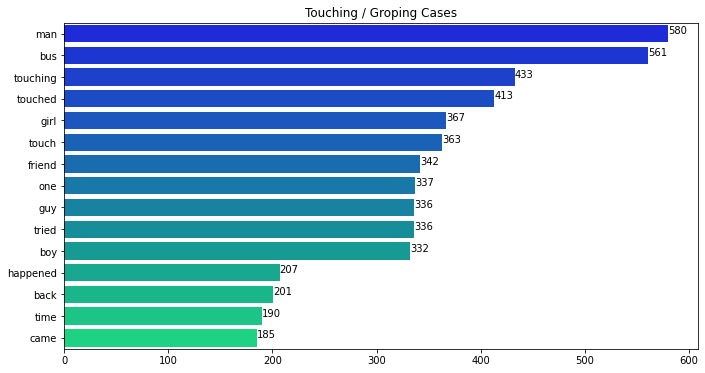

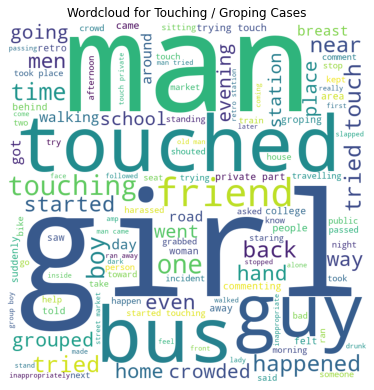

In [ ]:
grope_freq = plot_frequent(uni_grope_data,"Touching / Groping Cases")
# print()
plot_wordcloud(uni_grope_data, "Touching / Groping Cases")

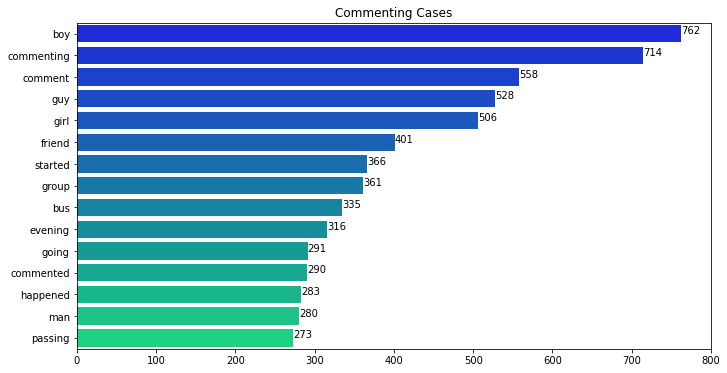

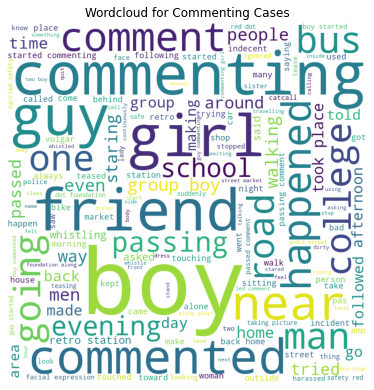

In [ ]:
comment_freq = plot_frequent(uni_comment_data,"Commenting Cases")
print()
plot_wordcloud(uni_comment_data, "Commenting Cases")

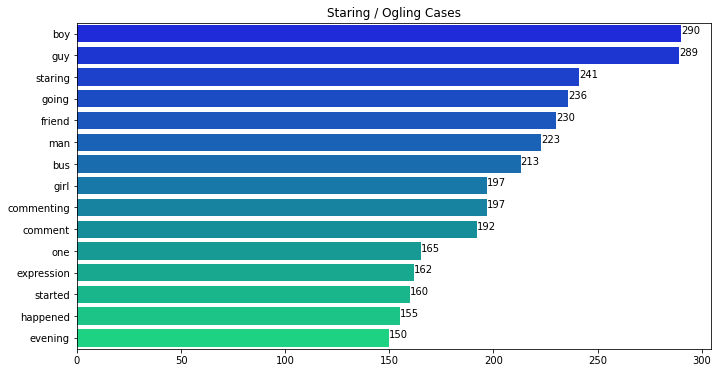

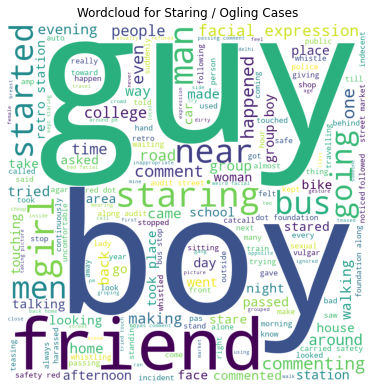

In [ ]:
stare_freq = plot_frequent(uni_stare_data,"Staring / Ogling Cases")
print()
plot_wordcloud(uni_stare_data, "Staring / Ogling Cases")


**Groping cases**
- Here we can see that the words man, bus, touching and touched are the most frequent 4 words.
- The words like 'bus' makes perfect sense as most groping cases may happen in crowded places like buses.
Wordcloud too emphasizes the same

**Commenting**
- The words boy, commenting and comment are the 3-most frequent words.
- Words boy and commenting occur 762,714 time which is almost 30-40% more than the next frequent word i.e comment,guy etc

**Staring**
= Here the top-frequent words are boy, guy, staring, going.

**Some Important Observations**
- We can see that some words appear commonly in all 3 classes. Such words are boy, guy, man, bus. We need to research more into this.
- Also, we see that words which are similar to the class_name are also very frequent. Ex. comment, commenting in case of Commenting cases, touching and touched in case of Groping cases. This can help us to identify classes better


### Considering only Bigrams

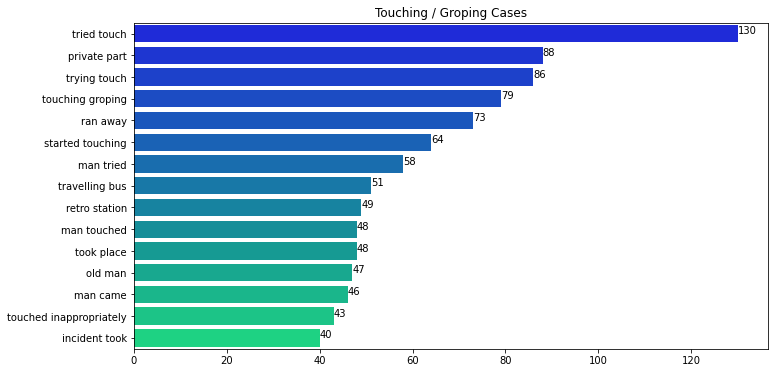

In [ ]:
bi_grope_freq = plot_frequent(bi_grope_data,"Touching / Groping Cases")
print()

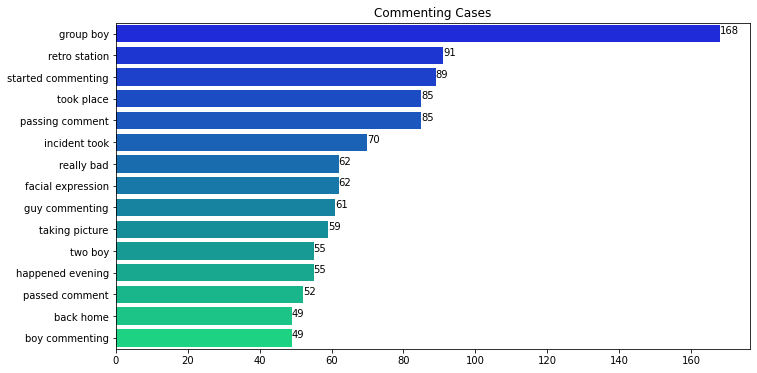

In [ ]:
bi_comment_freq = plot_frequent(bi_comment_data,"Commenting Cases")

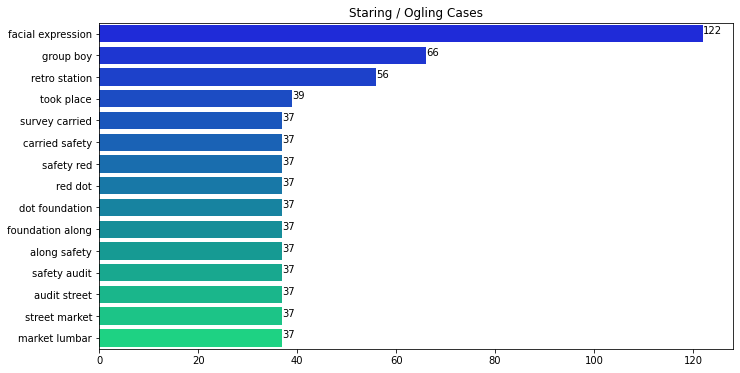

In [ ]:
bi_stare_freq = plot_frequent(bi_stare_data,"Staring / Ogling Cases")

**Observations**

- As we observed in case of Unigrams, words which are similar to the actual class labels appear more frequently. 
- In case of Groping cases, "tried touching"," trying touch" were significantly more frequent.
- In case of Commenting cases we saw "started commenting","passed comment"

- For Commenting cases, we see some interesting words.
"group boy" and "retro station" indicate presence of a group of boys in public places like stations lead to commenting cases.
- We see an overlap between the common words in Staring and Commenting cases. Thus it would hard to use the words like "facial expression","group boy","Station" to differentiate between the classes.


### Check if any words are in Top Frequent words in all classes

As in the previous steps, we saw that some words we commonly frequent in all the classes. We will try to look deeper in this issue n check

In [ ]:
# we only need words n not their count
comment_freq = [x[0] for x in comment_freq]
grope_freq = [x[0] for x in grope_freq]
stare_freq = [x[0] for x in stare_freq]

# grope_freq , comment_freq , stare_freq
def common_label_count():
  '''
      Calculate which words appear frequently in more than one class
  '''
  word_label_count = {1:[], 2:[] ,3:[]}
  words = set(comment_freq + grope_freq + stare_freq) #all top frequent words in 3 classes
  for word in words:
    count = 0
    if word in comment_freq:
      count += 1
    if word in grope_freq:
      count += 1
    if word in stare_freq:
      count += 1
    word_label_count[count].append(word)
  
  return word_label_count

In [ ]:
count_dict = common_label_count()
print("Frequent words common in 2 clases :",count_dict[2])
print("Frequent words common in all clases :",count_dict[3])

Frequent words common in 2 clases : ['one', 'comment', 'started', 'commenting', 'evening', 'going']
Frequent words common in all clases : ['man', 'girl', 'boy', 'happened', 'friend', 'guy', 'bus']


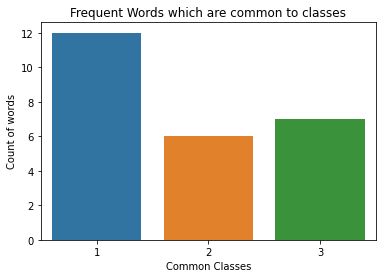

In [ ]:
sns.barplot(list(count_dict.keys()), list([len(val) for val in count_dict.values()]) )
plt.title("Frequent Words which are common to classes")
plt.xlabel("Common Classes")
plt.ylabel("Count of words")
plt.show()

 Observations
- We see that 6 words (comment', 'started', 'one', 'commenting', 'evening', 'going) appear frequently in 2 classes 
- Similarly 7 words ('man', 'bus', 'happened', 'friend', 'girl', 'guy', 'boy') appear in top-10 most frequent words in all 3 classes.
- Hence, we can conclude that these words cannot help our decision process much as they appear in all 3 classes

## Venn Diagrams

Here we try to count the no of data points which belong to classes in order to plot a Venn Diagram for our better understanding

In [ ]:
df_labels = df_train[["Commenting", "Staring", "Groping"]].values
# at least one label
print("Total samples :",len(df_labels))
df_labels = list(filter(lambda x:sum(x)>0, df_labels))
print("Samples which belong to atleast 1 class: ",len(df_labels))

countAB, countBC, countAC, countABC = 0, 0, 0, 0 
countA, countB, countC = 0, 0, 0
for arr in df_labels:
  if sum(arr) == 3:
    countABC += 1
  elif sum(arr)==1:
    if arr[0]==1:
      countA += 1
    elif arr[1]==1:
      countB += 1
    else:
      countC += 1
  elif arr[0]==1 and arr[1]==1:
    countAB += 1
  elif arr[1]==1 and arr[2]==1:
    countBC += 1
  else:
    countAC += 1

Total samples : 8189
Samples which belong to atleast 1 class:  5632


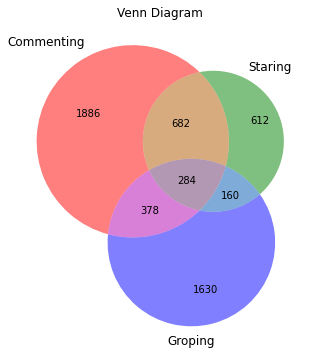

In [ ]:
plt.figure(figsize=(6,6))

venn3(subsets = (countA, countB, countAB, countC, countAC, countBC, countABC), set_labels = ("Commenting", "Staring", "Groping"), alpha = 0.5)
plt.title("Venn Diagram")
plt.show()

 **Observations**
- 2557 data points out of 8189 dont belong to any class
- 284 Data points belong to all 3 classes
- There is significantly lesser overlap between Groping and Staring. 160 samples belong to both
- There is larger overlap between Commenting and staring. 682 samples belong to both these classes. This is somewhat logically interpretable as people who faced Staring have more chances of having faced Commenting cases.
- We can also notice that most Staring cases are accompanied with Commenting and Groping cases.

## No of labels

In [ ]:
def count_labels(row):
  '''
  Count how many labels does a datapoint have (0,1,2,3)
  '''
  count = row["Groping"]+row["Staring"]+row["Commenting"]
  label_count[count] += 1
  if count == 0:
    res.append(row["Description"])

label_count = {0:0, 1:0, 2:0, 3:0}
res = []
df_train.apply(count_labels, axis=1)
print(label_count)

{0: 2557, 1: 4128, 2: 1220, 3: 284}


Text(0.5, 1.0, 'Count of labels ')

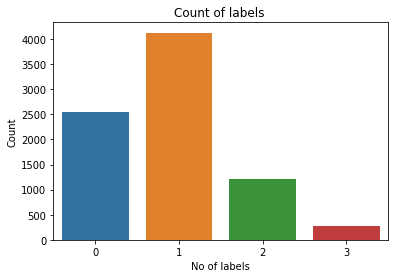

In [ ]:
sns.barplot(x=list(label_count.keys()),y=list(label_count.values()))
plt.xlabel("No of labels")
plt.ylabel("Count")
plt.title("Count of labels ")

**Observations**
- 4128 data points belong to only 1 class which is significantly higher than others
- 2557 data points do not belong to any classes
- Fewer data points belong to 2 classes (1220) and only 284 data points belong to 3 classes.
- We can observe that **81.6%** of data points either belong to one of the 3 classes or do not belong to any classes
- Only **19.4%** points have multiple labels i.e belong to multiple classes

##  tSNE visualization

- We use tf-idf vetorizer to convert uor word data in numerical vectors

- As tSNE is computationally Expensive,
1. We first use PCA to reduce the dimensions to 100
2. We then tSNE to visualize the data in 2 dimensions

In [ ]:
# Combine data for each category into a single dataframe for visualization

df_commenting = df_train[df_train["Commenting"]==1]["Description"]
df_staring = df_train[df_train["Staring"]==1]["Description"]
df_groping = df_train[df_train["Groping"]==1]["Description"]

df_commenting = pd.DataFrame({"Description":df_commenting, "class":0})
df_staring = pd.DataFrame({"Description":df_staring, "class":1})
df_groping = pd.DataFrame({"Description":df_groping, "class":2})

df_class = pd.concat([df_commenting, df_staring, df_groping])

In [ ]:
tsne_data_bi = TfidfVectorizer(ngram_range = (1,2)).fit_transform(df_class["Description"].values).todense()
print(tsne_data_bi.shape)

(7420, 40855)


In [ ]:
print("Before PCA shape : ",tsne_data_bi.shape)

# PCA -> 50 dim
pca = PCA(n_components=100)
pca_result = pca.fit_transform(tsne_data_bi)
print("After PCA shape : ", pca_result.shape)

# tSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)

print("t-SNE result shape : ",tsne_results.shape)

Before PCA shape :  (7420, 40855)
After PCA shape :  (7420, 100)
t-SNE result shape :  (7420, 2)


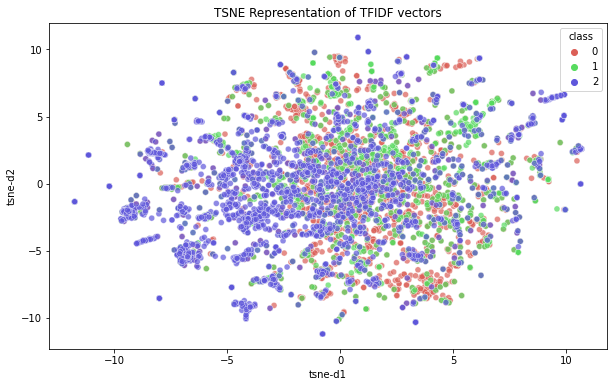

In [ ]:
# Plot the tSNE Visualizations
df_class['tsne-d1'] = tsne_results[:,0]
df_class['tsne-d2'] = tsne_results[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-d1", y="tsne-d2",
    hue="class", 
    data=df_class,
    legend="full",
    palette=sns.color_palette("hls", n_colors=3),
    alpha=0.7
)

plt.title("TSNE Representation of TFIDF vectors")
plt.show()

From the tSNE visualization we are not able to visually differentiate among the classes just based on the word vectors . Hence, we would need extract some more meaningful features to help classification.

# Feature Engineering + Adding New features (EDA on those)

## Map from multi-label to mulitclass classification
0 - None <br>
1 - Staring<br>
2 - Groping<br>
3 - Commenting<br>
4 - Commenting & Staring<br>
5 - Staring & Groping<br>
6 - Commenting & Groping<br>
7 - All Classes<br>

In [ ]:
class_labels = {0:"None",1:"Staring",2:"Groping",3:"Commenting",4:"Commenting & Staring",5:"Staring & Groping",6:"Commenting & Groping",7:"All Classes"}

def map_to_class(row):
  '''
    Maps muliple lables into single label.
    It return an integer 0-7 which is then used as the class_label 
  '''

  comment = row["Commenting"]
  stare = row["Staring"]
  grope = row["Groping"]

  cSum = comment+stare+grope

  if cSum == 0:
    return 0
  elif cSum == 1:
    return 1 if stare==1 else 2 if grope==1 else 3
  elif cSum == 2:
    if comment==1 and stare==1:
      return 4
    elif stare==1 and grope==1:
      return 5
    else:
      return 6
  else:
    return 7
  

In [ ]:
df_train["class"] = df_train.apply(map_to_class, axis=1)

# remove existing class labels
df_train = df_train.drop(columns=["Commenting","Staring","Groping",""])
df_train.head(5)

,Description,class
0,Buses approaching to this place is highly unsafe.,6
1,a man was commenting at me.,3
2,in a share auto,2
3,I was coming out of a club at night with a few...,3
4,One of my friends was molested in the crowd. T...,2


In [ ]:
df_train[df_train["class"]==6]["Description"].values[120:130]

array(['around 6 pm evening i was returning home .i saw one man beating one girl and snatching her neck chain',
       'people commenting on girls specially on their dresses.',
       'I was travelling and somebody was staring at me and following me.',
       'This incident took place near Khalsa college in the afternoon.It usually happens while travelling in bus from the college to hostel and vice versa.',
       'We colleagues meet at this walkover at andheri east towards talao pali. Of late there r minor girls who touch and pass lewd remarks to people. These girls r accompanied wid male counterparts who watch these incidents frm a distance. They use foul language and bad words.i do not know the night scene but this happens throughout the day',
       'a girl was being teased by the gang of boys in the public vehicle. the people in the bus try to save the girl but those guys threatened other people by saying if they interfere or complain to anyone they will kill everyone so nobody to

In [ ]:
texts = np.array(texts)
np.save("texts.npy", texts)

{0: 540, 3: 369, 2: 336, 4: 137, 1: 130, 6: 81, 7: 67, 5: 41}


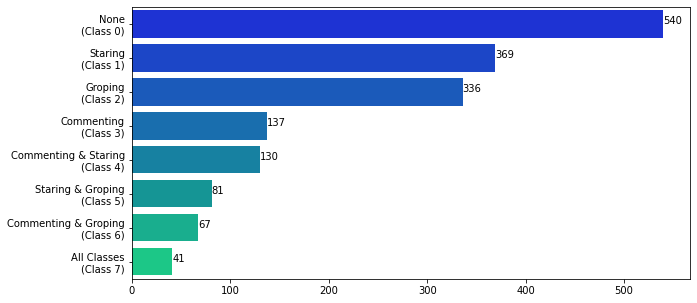

In [ ]:
# Visualize the distribution of new class labels
count_labels = df_test["class"].value_counts().to_dict()
print(count_labels)

labels = [label+"\n(Class "+str(i)+")" for i,label in enumerate(list(class_labels.values()))]

plt.figure(figsize=(10,5))
g = sns.barplot(y=list(class_labels.keys()),x=list(count_labels.values()), orient='h', palette="winter")
g.set_yticklabels(labels)

for index,val in enumerate(list(count_labels.values())):
  plt.text(val, index, str(val))
plt.show()

**Observations**
1. We can note that **31%** of the data points dont belong to any class
2. 23% Belong to Staring only cases and 19% belong to groping only cases
3. Only **1%** of the data belongs to All three categories
4. We can observe the general trend : <br> 
Samples belonging to 0 class > Samples belonging to only 1 class > Samples belonging to 2 classes > Samples belonging to all classes

## Length of sentence

Text(0.5, 1.0, 'Word Counts Distribution')

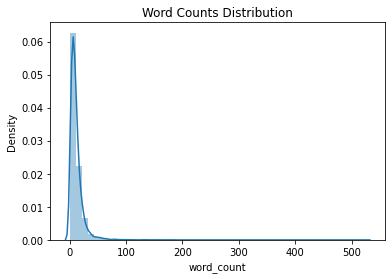

In [ ]:
df_train["word_count"] = df_train["Description"].apply(lambda x: len(x.split(" ")))
sns.distplot(a=df_train["word_count"], kde=True)
plt.title("Word Counts Distribution")

In [ ]:
wc_greater_100 = len(df_train[df_train['word_count']>100])
wc_greater_300 = len(df_train[df_train['word_count']>300])
print("Word_count>100 : ",wc_greater_100)
print("Word_count>300 : ",wc_greater_300)

Word_count>100 :  29
Word_count>300 :  5


Here we can observe that most Descriptions have a word count between 0-100. Very few samples have word_counts > 100
- Only 29 samples have word count > 100
- Only 5 samples have count > 300

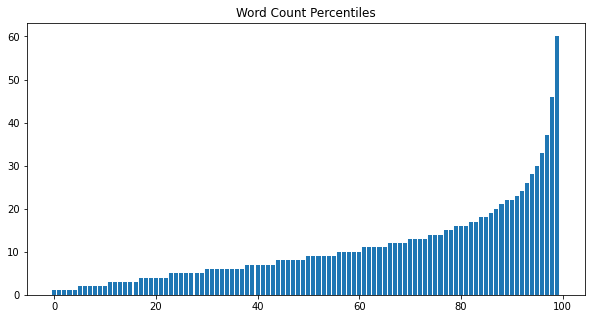

In [ ]:
# Plotting the percentiles
word_count_list = df_train["word_count"]
per_index = list(range(0,100,1))
percentiles = [np.percentile(word_count_list, per) for per in per_index]
plt.figure(figsize=(10,5))
plt.bar(per_index,percentiles)
plt.title("Word Count Percentiles")
plt.show()

In [ ]:
print("--> 90 to 99th Percentiles")
for idx, val in enumerate([np.percentile(word_count_list, i) for i in range(90,101)]):
  print("%d Percentile : %f"%(90+idx,val))

print("\n\n--> 99 to 100th Percentiles")
for idx, val in enumerate([np.percentile(word_count_list, i) for i in np.linspace(99,100,10)]):
  print("99.%d Percentile : %f"%(idx,val))

--> 90 to 99th Percentiles
90 Percentile : 22.000000
91 Percentile : 23.000000
92 Percentile : 24.000000
93 Percentile : 26.000000
94 Percentile : 28.000000
95 Percentile : 30.000000
96 Percentile : 33.000000
97 Percentile : 37.000000
98 Percentile : 46.000000
99 Percentile : 60.120000
100 Percentile : 524.000000


--> 99 to 100th Percentiles
99.0 Percentile : 60.120000
99.1 Percentile : 64.000000
99.2 Percentile : 67.000000
99.3 Percentile : 73.413333
99.4 Percentile : 80.000000
99.5 Percentile : 88.044444
99.6 Percentile : 101.706667
99.7 Percentile : 131.000000
99.8 Percentile : 178.315556
99.9 Percentile : 524.000000


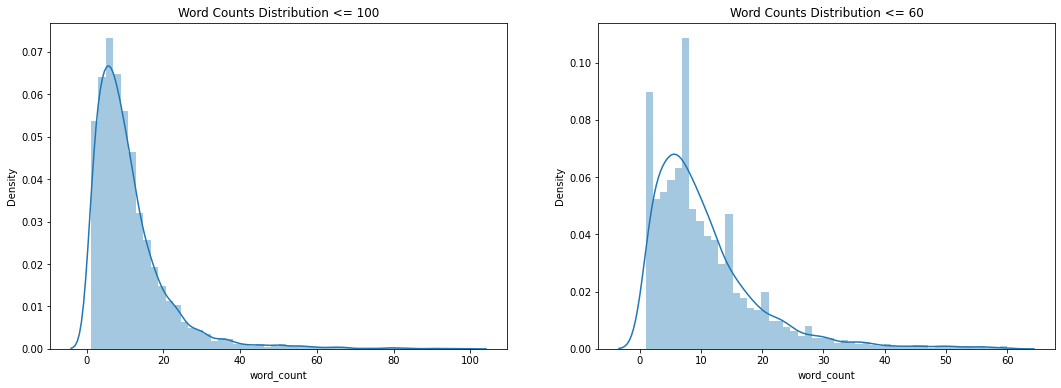

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1, 2,1)
sns.distplot(df_train[df_train['word_count']<=100]["word_count"], kde=True)
plt.title("Word Counts Distribution <= 100")
plt.subplot(1,2,2)
sns.distplot(df_train[df_train['word_count']<=60]["word_count"], kde=True)
plt.title("Word Counts Distribution <= 60")
plt.show()

**Observations**
- From the Word Counts Distribution we found that only 29+5 = 34 samples had word_counts > 100
- When we look at the percentiles, we find that 99% of the samples have word_count < 60
- We again zoom into the distributions and find that majority of the word_counts are distributed betwwen 1-20 and taper off. We can conclude that the descriptions given by users are usually short and dont include lengthy descriptions of the incident
- **From the observations we will consider word_count greater than 88(99.5th Percentile) as outliers.**

## Average Word Length

Text(0.5, 1.0, 'Average Word Length Distribution')

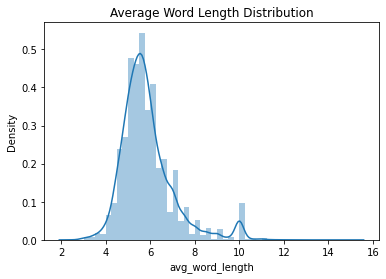

In [ ]:
df_train["avg_word_length"] = df_train["Description"].apply(lambda x: np.mean([len(word) for word in x.split(" ")]))
sns.distplot(a=df_train["avg_word_length"], kde=True)
plt.title("Average Word Length Distribution")

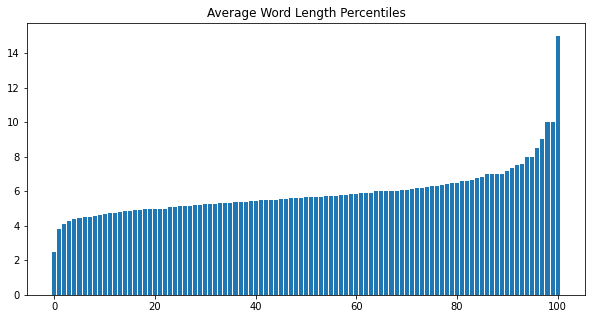

In [ ]:
word_count_list = df_train["avg_word_length"]
per_index = list(range(0,101,1))
percentiles = [np.percentile(word_count_list, per) for per in per_index]

plt.figure(figsize=(10,5))
plt.bar(per_index, percentiles)
plt.title("Average Word Length Percentiles")
plt.show()

In [ ]:
for idx, val in enumerate(percentiles[90:]):
  print("%d Percentile : %f"%(90+idx,val))

print("\n\n--> 99 to 100th Percentiles")
for idx, val in enumerate([np.percentile(word_count_list, i) for i in np.linspace(99,100,10)]):
  print("99.%d Percentile : %f"%(idx,val))

90 Percentile : 7.200000
91 Percentile : 7.333333
92 Percentile : 7.500000
93 Percentile : 7.600000
94 Percentile : 8.000000
95 Percentile : 8.000000
96 Percentile : 8.500000
97 Percentile : 9.000000
98 Percentile : 10.000000
99 Percentile : 10.000000
100 Percentile : 15.000000


--> 99 to 100th Percentiles
99.0 Percentile : 10.000000
99.1 Percentile : 10.000000
99.2 Percentile : 10.000000
99.3 Percentile : 10.000000
99.4 Percentile : 10.000000
99.5 Percentile : 10.000000
99.6 Percentile : 10.000000
99.7 Percentile : 10.500000
99.8 Percentile : 11.000000
99.9 Percentile : 15.000000


**Observations**
- Very few samples have average word length > 10 which is expected as most commonly used words in English are shorter than 10 characters.
- 99% of the descriptions had average word length <= 10 and around 90% had average <= 8.
- We can conclude that similar to the trend regarding word_counts, the descriptions are concise are include smaller words rather than long and comprehensive words.
- **From above observation we will consider samples having average word length > 10(99.7th percentiles) as outliers.**

## Text Scoring Metrics
1. Difficulty Score
2. flesch_reading_ease
3. coleman_liau_index
4. flesch_kincaid_grade

In order to get some more sense from the Data, we try to use various metrics which can be used to score the text based on various parameters. Here we choose 4 such metrics.

1. **Difficulty Score **:
- It is a measure of relative level of difficulty of the words used in the sentence. A text written in normal english words will have a lower score compared to a text written with words which are less frequently used.
-A high Difficulty score may indicate better English Vocabulary which may show that the writer is well versed in written English Communication
2. **Flesch reading ease**
- It indicates how easy a text is to understand.It works on idea that shorter words and shorter sentences are easier to read
- Higher the score, the more easier it is to understand the text
- It may also indicate the age_group or educational_level. <br>
Ref : https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests

  ![](https://drive.google.com/uc?export=view&id=1ZU3JNnQvZOO36s8rPDEj3yF-VPM_lMEN)

3. **Flesch Kincaid Grade**
- It gives a score to textto judge the readability level of the text.
- The grade level formula emphasizes sentence length over word length.
4. **Coleman Liau index**
- Intended to gauge the understandability of a text
- Its similar to Flesch Score, but relies on characters instead of syllables per word


In [ ]:
# https://pypi.org/project/textstat/
df_train["difficult_words_score"] = df_train["Description"].apply(lambda x: textstat.difficult_words(x))
df_train["flesch_reading_ease"] = df_train["Description"].apply(lambda x: textstat.flesch_reading_ease(x))
df_train["flesch_kincaid_grade"] = df_train["Description"].apply(lambda x: textstat.flesch_kincaid_grade(x))
df_train["coleman_liau_index"] = df_train["Description"].apply(lambda x: textstat.coleman_liau_index(x))


## POS tagging features


In [ ]:
pos_re = {"noun":re.compile('N.*'), "verb":re.compile('V.*'),
          "adverb":re.compile('R.*'), "adjective":re.compile('J.*'),
          "pronoun":re.compile('J.*')}

def count_POS(text, part_of_speech):
  '''
    Given a text and part_of_speech, First convert the text into tokens
    Then using nlp package get the POS tags.
    Count the number of words which belong to the specified part_of_speech

    Ex : for Nouns we have POS tags NN, NNP, NNR.. So we make use of regular expressions for matching
  '''
  count = 0
  pos_tokens = nltk.pos_tag(word_tokenize(text))

  for word, pos in pos_tokens:
    if re.match(pos_re[part_of_speech],pos):
      count += 1
  return count


In [ ]:
df_train["noun_count"] = df_train["Description"].apply(lambda x: count_POS(x,"noun"))
df_train["pronoun_count"] = df_train["Description"].apply(lambda x: count_POS(x,"pronoun"))
df_train["verb_count"] = df_train["Description"].apply(lambda x: count_POS(x,"verb"))
df_train["adverb_count"] = df_train["Description"].apply(lambda x: count_POS(x,"adverb"))
df_train["adjective_count"] = df_train["Description"].apply(lambda x: count_POS(x,"adjective"))

In [ ]:
df_train.head()

Description              0
class                    0
word_count               0
avg_word_length          0
difficult_words_score    0
flesch_reading_ease      0
flesch_kincaid_grade     0
coleman_liau_index       0
noun_count               0
pronoun_count            0
verb_count               0
adverb_count             0
adjective_count          0
dtype: int64

## Remove outliers in train data acc to observations

In [ ]:
word_count > 88, avg_word_length > 10
original_train_len = df_train.shape[0]
df_train = df_train[df_train["word_count"]<=88]
df_train = df_train[df_train["avg_word_length"]<=10]

In [ ]:
df_train.shape

(8189, 13)

## Feature engineering on Test Data features

In [ ]:
def extract_features(data):
  data["Description"] = data["Description"].apply(pre_process_text)
  data["word_count"] = data["Description"].apply(lambda x: len(x.split(" ")))

  data["avg_word_length"] = data["Description"].apply(lambda x: np.mean([len(word) for word in x.split(" ")]))

  data["difficult_words_score"] = data["Description"].apply(lambda x: textstat.difficult_words(x))
  data["flesch_reading_ease"] = data["Description"].apply(lambda x: textstat.flesch_reading_ease(x))
  data["flesch_kincaid_grade"] = data["Description"].apply(lambda x: textstat.flesch_kincaid_grade(x))
  data["coleman_liau_index"] = data["Description"].apply(lambda x: textstat.coleman_liau_index(x))

  data["noun_count"] = data["Description"].apply(lambda x: count_POS(x,"noun"))
  data["pronoun_count"] = data["Description"].apply(lambda x: count_POS(x,"pronoun"))
  data["verb_count"] = data["Description"].apply(lambda x: count_POS(x,"verb"))
  data["adverb_count"] = data["Description"].apply(lambda x: count_POS(x,"adverb"))
  data["adjective_count"] = data["Description"].apply(lambda x: count_POS(x,"adjective"))

  # multilabel -> multiclass
  data["class"] = data.apply(map_to_class, axis=1)
  data = data.drop(columns=["Commenting","Staring","Groping"])

  return data

df_test = extract_features(df_test)

In [ ]:
df_test.head(5)

,Description,Commenting,Staring,Groping,word_count,avg_word_length,difficult_words_score,flesch_reading_ease,flesch_kincaid_grade,coleman_liau_index,noun_count,pronoun_count,verb_count,adverb_count,adjective_count
0,morning woman walking thin guy came around cal...,1,1,0,14,5.642857,3,57.27,8.8,14.84,6,2,5,1,2
1,man tried brush penis woman shoulder bus,0,0,1,7,4.857143,1,81.29,3.7,8.24,5,1,1,0,1
2,happened fellow passenger mine travelling retr...,0,1,0,11,7.818182,3,18.01,13.5,26.89,5,2,4,0,2
3,going,0,1,0,1,5.000000,0,36.62,8.4,-16.41,0,0,1,0,0
4,returning home finishing class queue get micro...,0,0,1,15,5.266667,4,64.71,8.0,12.69,8,3,4,0,3


In [ ]:
# df_train.to_csv("clean_train.csv",index=False)
# df_test.to_csv("clean_test.csv",index=False)

# !cp "clean_train.csv" "/content/drive/MyDrive/Datasets/"
# !cp "clean_test.csv" "/content/drive/MyDrive/Datasets/"

## Vectorize Descriptions using tfidf-weighted Word2Vec
1. Loading pretrained glove vectors to get Word-2-Vec vectors
2. Using tfidf vectorizer to find TF_IDF values of the word
3. Using tfidf values along with glove_vector to find tf-idf weighted W2V representation for each Description

In [ ]:
# Download Glove Vectors
# !gdown --id "1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j"

# Download Glove Vector 
# Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download)
# import wget
# url = "http://nlp.stanford.edu/data/glove.840B.300d.zip"
# wget.download("url", 'glove.840B.300d.zip')
!unzip "/content/glove.840B.300d.zip"

Archive:  /content/glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [ ]:
# Load glove vectors and save 300d vector for each word
glove_vectors = {}
a = ""
with open("/content/glove.840B.300d.txt", 'r', encoding="utf-8") as f:
  for line in f:
    values = line.split()
    word = values[0]
    try:
      vector = np.asarray(values[1:], "float32")
    except Exception as e:
      continue
    glove_vectors[word] = vector


In [ ]:
glove_words = set(glove_vectors.keys())

In [ ]:
# Store data (serialize)
with open('glove_vector_300d.pickle', 'wb') as handle:
    pickle.dump(glove_vectors, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load data (deserialize)
# with open('filename.pickle', 'rb') as handle:
#     glove_vectors = pickle.load(handle)

In [ ]:
tfidf_vec = TfidfVectorizer()
tfidf_vec.fit(df_train["Description"].values)
tfidf_dict = dict(zip(tfidf_vec.get_feature_names(), list(tfidf_vec.idf_)))
tfidf_words = set(tfidf_vec.get_feature_names())

In [ ]:
# TF-IDF WEIGHTED W2V
def tfdidf_w2v(data):
  '''
   Find tfidf-weighted Word2Vec
  '''
  tfidf_w2v_vectors = []; 
  for sentence in tqdm(data):
      vector = np.zeros(300) 
      tf_idf_weight =0
      for word in sentence.split(): 
          if (word in glove_words) and (word in tfidf_words):
              vec = glove_vectors[word] 
              tf_idf = tfidf_dict[word]*(sentence.count(word)/len(sentence.split()))
              vector += (vec * tf_idf) 
              tf_idf_weight += tf_idf
      if tf_idf_weight != 0:
          vector /= tf_idf_weight
      tfidf_w2v_vectors.append(vector)
  return tfidf_w2v_vectors

In [ ]:
train_data_text = tfdidf_w2v(df_train["Description"].values)
test_data_text = tfdidf_w2v(df_test["Description"].values)

np.save('train_data_text.npy', train_data_text)
np.save('test_data_text.npy', test_data_text)

100%|██████████| 1701/1701 [00:00<00:00, 9490.55it/s]


In [ ]:
print("Shape after tfid-W2V : (%d,%d)"%(len(train_data_text),len(train_data_text[0])))
print("Shape after tfid-W2V : (%d,%d)"%(len(test_data_text),len(test_data_text[0])))

Shape after tfid-W2V : (8189,300)
Shape after tfid-W2V : (1701,300)


## FastText word embeddings

In [ ]:
df_test = pd.read_csv("clean_test.csv")
df_train = pd.read_csv("clean_train.csv")

In [ ]:
from gensim.models import FastText
!wget wget --header="Host: dl.fbaipublicfiles.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8,la;q=0.7" --header="Referer: https://fasttext.cc/" "https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip" -c -O 'wiki-news-300d-1M.vec.zip'
!unzip "wiki-news-300d-1M.vec.zip"

--2021-09-30 01:40:34--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-09-30 01:40:34--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.75.142, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  20.4MB/s    in 33s     

2021-09-30 01:41:07 (19.9 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

FINISHED --2021-09-30 01:41:07--
Total wall clock time: 33s
Downloaded: 1 files, 650M in 33s (19.9 MB/s)
Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [ ]:
def load_fasttext(): # Function to load Fast Text model
    fast_text_model = {}
    f = open('wiki-news-300d-1M.vec', encoding='utf-8')
    for line in (f):
        values = line.strip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        fast_text_model[word] = coefs
    f.close()
    return fast_text_model
    
fast_text = load_fasttext()

def fast_text_embed(X): #Fuction to convert text to embedding
    x = []
    for sentence in (X): # for each sentence
        vector = np.zeros(300) 
        for word in sentence.split(): # for each word in a sentence
            if word in fast_text.keys():
                vector += fast_text[word]
        x.append(vector)
    x = np.array(x)
    return x

In [ ]:
train_data_fast_text = fast_text_embed(df_train["Description"].values)
test_data_fast_text = fast_text_embed(df_test["Description"].values)

np.save('train_data_fast_text.npy', train_data_fast_text)
np.save('test_data_fast_text.npy', test_data_fast_text)

# !cp 'train_data_fast_text.npy' '/content/drive/MyDrive/Datasets/CS1/'
# !cp 'test_data_fast_text.npy' '/content/drive/MyDrive/Datasets/CS1/'

In [ ]:
print(train_data_fast_text.shape)
print(test_data_fast_text.shape)

(8189, 300)
(1701, 300)


## BERT Embeddings


In [7]:
df_test = pd.read_csv("clean_test.csv")
df_train = pd.read_csv("clean_train.csv")

In [8]:
from transformers import DistilBertConfig, DistilBertTokenizer, TFDistilBertModel, pipeline
import numpy as np
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased') # Loading Tokenizer
config = DistilBertConfig.from_pretrained('distilbert-base-uncased', output_hidden_states = True) # Loading COnfig File
model = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config = config) # Loading Model

nlp = pipeline('feature-extraction', model = model, tokenizer = tokenizer, framework = "tf") # Defining Pipling as Feature-Extractor
def convertion(string):
    inputs = tokenizer(string, return_tensors = "tf")
    outputs = model(inputs)
    outputs = np.concatenate((outputs[1][6][0,0,:],outputs[1][5][0,0,:],outputs[1][4][0,0,:],outputs[1][3][0,0,:]), axis=0) # Concatinating Only 3,4,5,6 layer of BERT
    return np.array(outputs[:512])

def convertor(X):
    sent =[]
    vec=[]
    for i in (X):
        text = i[:512]
        vec.append(convertion(text))
    return vec


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_transform', 'vocab_layer_norm', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [9]:
train_X = convertor(df_train["Description"])
test_X = convertor(df_test["Description"])

In [64]:
train_data_bert = np.load("/content/drive/MyDrive/Datasets/CS1/train_data_bert_full.npy")
test_data_bert = np.load("/content/drive/MyDrive/Datasets/CS1/test_data_bert_full.npy")
print(train_data_bert.shape)
print(test_data_bert.shape)
# train_data_bert = np.array(train_x)
# test_data_bert = np.array(test_X)
# np.save('test_data_bert_full.npy', test_data_bert)
# np.save('train_data_bert_full.npy', train_data_bert)

(8189, 3072)
(1701, 512)


In [65]:
train_data_bert = np.array([x[:512] for x in train_data_bert])
test_data_bert = np.array([x[:512] for x in test_data_bert])
print(train_data_bert.shape)
print(test_data_bert.shape)
np.save('train_data_bert_full.npy', train_data_bert)
np.save('test_data_bert_full.npy', test_data_bert)

(8189, 512)
(1701, 512)


## Stacking all features 

In [66]:
# clean_train.csv and clean_test.csv are cleaned datasets
df_train = pd.read_csv("clean_train.csv")
df_test = pd.read_csv("clean_test.csv")

# Load saved vector representations of words
train_data_text = np.load("train_data_bert_full.npy")
test_data_text = np.load("test_data_bert_full.npy")

train_data = df_train.drop(columns=["class","Description"]).values
test_data = df_test.drop(columns=["Description","class"]).values

# Horizontally Stack all features
train_data = np.hstack((train_data_text, train_data))
test_data = np.hstack((test_data_text, test_data))

In [67]:
print("Train Data Shape: ",train_data.shape)
print("Test Data Shape: ",test_data.shape)

Train Data Shape:  (8189, 523)
Test Data Shape:  (1701, 523)


In [68]:
X_train = train_data
X_test = test_data

y_train = df_train["class"].values
y_test = df_test["class"].values

In [ ]:
# Use FastText Embeddings
# clean_train.csv and clean_test.csv are cleaned datasets
df_train_fs = pd.read_csv("clean_train.csv")
df_test_fs = pd.read_csv("clean_test.csv")

# Load saved vector representations of words
train_data_text_fs = np.load("train_data_fast_text.npy")
test_data_text_fs = np.load("test_data_fast_text.npy")
train_data_text = train_data_text_fs
test_data_text = test_data_text_fs

train_data_fs = df_train_fs.drop(columns=["class","Description"]).values
test_data_fs = df_test_fs.drop(columns=["Description","class"]).values

# Horizontally Stack all features
train_data_fs = np.hstack((train_data_text_fs, train_data_fs))
test_data_fs = np.hstack((test_data_text_fs, test_data_fs))

X_train_fs = train_data_fs
X_test_fs = test_data_fs

print("Train Data Shape: ",train_data_fs.shape)
print("Test Data Shape: ",test_data_fs.shape)

y_train_fs = df_train_fs["class"].values
y_test_fs = df_test_fs["class"].values

X_train = X_train_fs
y_train = y_train_fs
X_test = X_test_fs
y_test= y_test_fs

Train Data Shape:  (8189, 311)
Test Data Shape:  (1701, 311)




# First-Cut Model Building

In [30]:
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

def plot_confusion_matrix(test_y, predict_y):
  ''' 
    Plot the normalized Condusion Matrix (Row sum = 1)
  '''
  skplt.metrics.plot_confusion_matrix(test_y, predict_y,normalize=True,figsize=(13,7),cmap='Blues')
  plt.show()


def print_metrics(built_model):
  '''
  Function to print all metrics wrt to Train and Test Data
  '''
  print("*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-")
  logLoss = log_loss(y_train, built_model.predict_proba(X_train))
  f1Score = f1_score(y_train, built_model.predict(X_train), average='weighted')
  print("Log Loss: ", logLoss)
  print("Precision : ",precision_score(y_train,built_model.predict(X_train),average='weighted'))
  print("Recall : ",recall_score(y_train,built_model.predict(X_train),average='weighted'))
  print("F1-Score : ",f1Score)

  print("\n*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-")
  logLoss = log_loss(y_test, built_model.predict_proba(X_test))
  f1Score = f1_score(y_test, built_model.predict(X_test), average='weighted')
  print("Log Loss: ", logLoss)
  print("Precision : ",precision_score(y_test,built_model.predict(X_test),average='weighted'))
  print("Recall : ",recall_score(y_test,built_model.predict(X_test),average='weighted'))
  print("F1-Score : ",f1Score)

  print()
  plot_confusion_matrix(y_test, built_model.predict(X_test))


## Dummy Model / Random Model

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  27.49099334986298
Precision :  0.20166650721306797
Recall :  0.20490902430089145
F1-Score :  0.19739857163375354

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  26.8025778020471
Precision :  0.21745200366649897
Recall :  0.19576719576719576
F1-Score :  0.2101663478261619



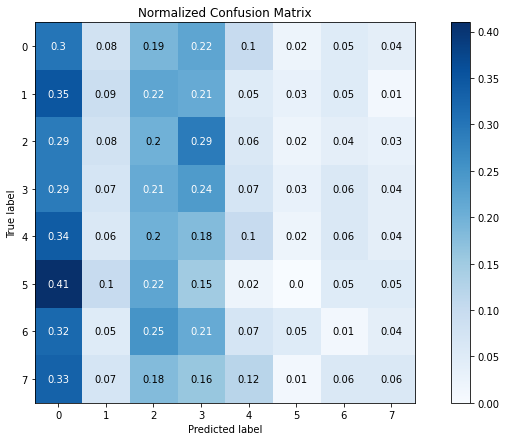

In [ ]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
print_metrics(dummy_clf)

## SVM

In [ ]:
params = {'kernel':['linear', 'poly', 'rbf']}
svm_hyp = RandomizedSearchCV(svm.SVC(class_weight='balanced',probability=True), param_distributions=params, n_iter=10, n_jobs=-1, verbose=1)
svm_hyp.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 55.1min


In [ ]:
clf_svm = svm.SVC(probability=True)
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  1.6433140076405355
Precision :  0.2585364605231514
Recall :  0.33398461350592257
F1-Score :  0.21804880272524424

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.6730515499154515
Precision :  0.24210202775744066
Recall :  0.34156378600823045
F1-Score :  0.22124139869065784



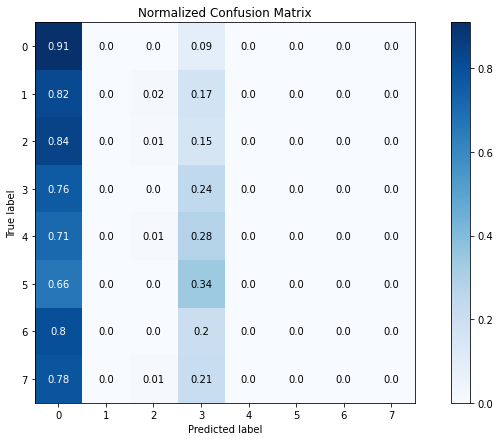

In [ ]:
print_metrics(clf_svm)

In [ ]:
# save the model to disk
pickle.dump(clf_svm, open('svm_model.sav', 'wb'))


NameError: ignored

## Logistic Regression

In [ ]:
params = {'C':uniform(0,200), 'penalty':['l1','l2']}
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
lr_hyp = RandomizedSearchCV(LogisticRegression(multi_class='ovr'), 
                            param_distributions=params,n_iter=10, n_jobs=-1,  verbose=1,
                            scoring=LogLoss)
lr_hyp.fit(X_train,y_train)

In [ ]:
print(lr_hyp.best_score_)
print(log_loss(y_test, lr_hyp.predict_proba(X_test)))
print(lr_hyp.best_estimator_)

In [ ]:
clf_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  1.5151565639944078
Precision :  0.44226648734521634
Recall :  0.4860178287947246
F1-Score :  0.43092919162666615

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.5633254292702348
Precision :  0.40379046846517463
Recall :  0.4679600235155791
F1-Score :  0.4080756473162994



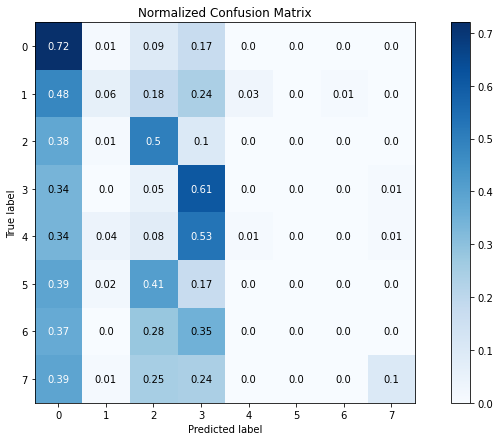

In [ ]:
print_metrics(clf_lr)

## Random Forest

In [ ]:
params = {'n_estimators':randint(10,500), 'max_depth':randint(0,10),"min_samples_split":randint(0,10)}
rf_hyp = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, n_iter=10, verbose=1,n_jobs=-1)
rf_hyp.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.3809440052212837
Precision :  0.9550526176594095
Recall :  0.9534741726706557
F1-Score :  0.9534514753081178

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.7761361104982314
Precision :  0.5120257003708684
Recall :  0.4985302763080541
F1-Score :  0.45112602065219015



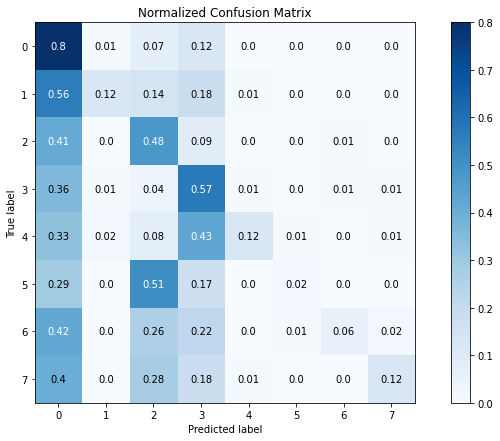

In [ ]:
print_metrics(rf_clf)

## XGBoost

In [ ]:
logLoss = log_loss(y_test, clf_svm.predict_proba(X_test))
params = {'max_depth':randint(1,50),"n_estimators":randint(10,200)}
xgb_hyp = RandomizedSearchCV(XGBClassifier(),param_distributions=params, verbose=1,n_jobs=-1,scoring=LogLoss)
xgb_hyp.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
clf_xgb = XGBClassifier(max_depth=5, n_estimators=100,n_jobs=-1)
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.5215152288550625
Precision :  0.9155381531251294
Recall :  0.9131762119916962
F1-Score :  0.912340101734852

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.3763748991939906
Precision :  0.5515603151591454
Recall :  0.544973544973545
F1-Score :  0.5078187357632125



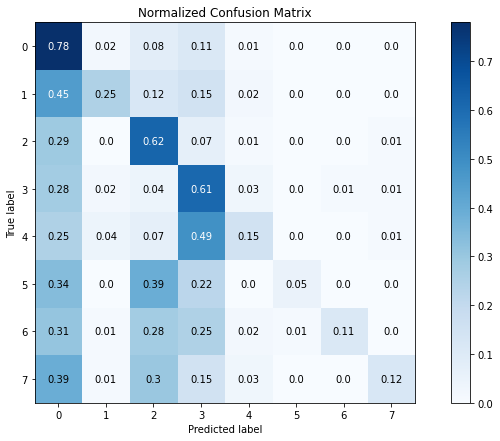

In [ ]:
print_metrics(clf_xgb)

In [ ]:
# save the model to disk
pickle.dump(clf_xgb, open('xgb_model.sav', 'wb'))

## LightGBM

In [ ]:
lbgm_clf = LGBMClassifier(max_depth=5,n_estimators=100,n_jobs=-1)
lbgm_clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.5159652371366151
Precision :  0.9166006612931137
Recall :  0.9145194773476615
F1-Score :  0.914049511394868

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.3778260716881254
Precision :  0.5565702819816909
Recall :  0.551440329218107
F1-Score :  0.5147596766234903



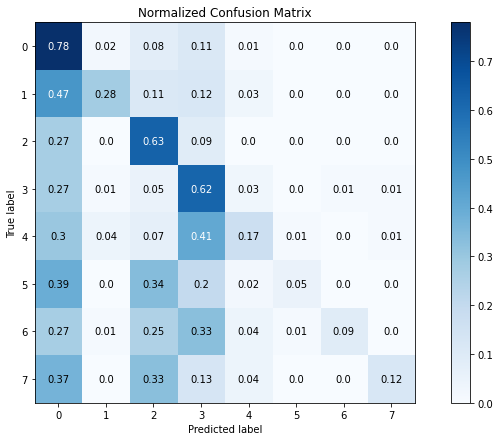

In [ ]:
print_metrics(lbgm_clf)

## Decision *Trees*

In [ ]:
clf_dt = DecisionTreeClassifier(class_weight='balanced', max_depth=200,min_samples_split=4)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=200, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.19838840360685966
Precision :  0.9177575987756926
Recall :  0.9071925754060325
F1-Score :  0.9094469587714051

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  20.395377531287536
Precision :  0.35640789222646896
Recall :  0.339212228101117
F1-Score :  0.3461225527613288



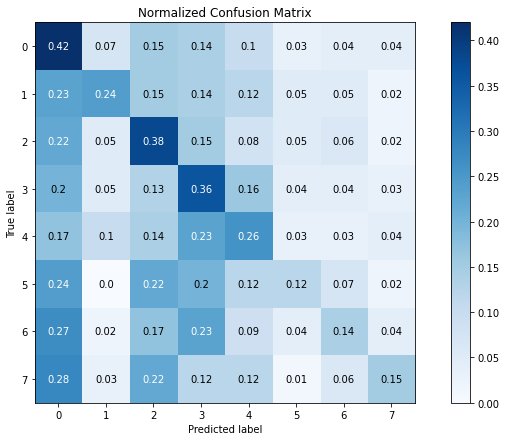

In [ ]:
print_metrics(clf_dt)

## Naive Bayes


In [ ]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  8.729698408700274
Precision :  0.4727389078498666
Recall :  0.37599218463792894
F1-Score :  0.38252262297561007

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  9.230699084517463
Precision :  0.44390935821383415
Recall :  0.3527336860670194
F1-Score :  0.3644833834640416



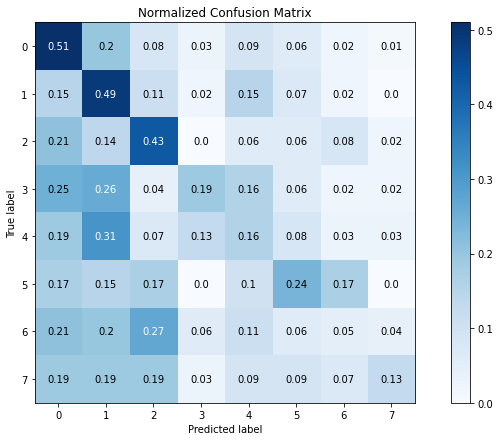

In [ ]:
print_metrics(clf_nb)

## CatBoost

In [31]:
from catboost import CatBoostClassifier

In [ ]:
clf_cb = CatBoostClassifier(verbose=0, n_estimators=200)
clf_cb.fit(X_train, y_train)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.49023319499416124
Precision :  0.9004902530607986
Recall :  0.8977897179142752
F1-Score :  0.8966334792048346

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.4344647184577888
Precision :  0.5293233448311715
Recall :  0.5390946502057613
F1-Score :  0.5049982139919679



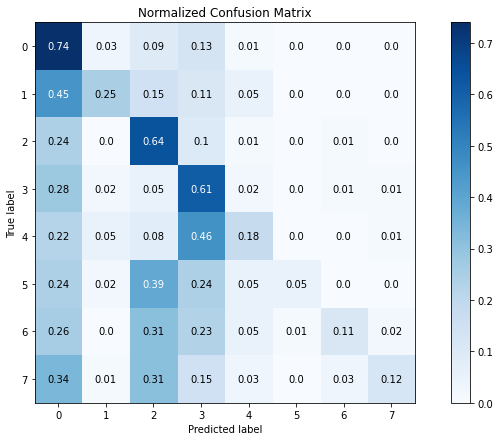

In [ ]:
print_metrics(clf_cb)

## Observations 



In [32]:
def print_metrics_table(models):
  '''
  Input : List of tuples -> (model_name, model)
  Ouput : Print table of metrics for all passed models
  '''

  my_table = PrettyTable()
  my_table.field_names = ["          ", "TRAIN METRICS","     "," ","  ","TEST METRICS","      ","   ","    "]
  my_table.add_row(["MODEL","Log-Loss", "f1-Sore","Precision", "Recall","Log-Loss", "F1-Score", "Precision", "Recall"])
  my_table.add_row(["---------","---------","---------","---------","---------","---------","---------","---------","---------"])

  rows = []
  for model_name, built_model in models:
    row = [model_name]

    logLoss = log_loss(y_train, built_model.predict_proba(X_train))
    f1Score = f1_score(y_train, built_model.predict(X_train), average='weighted')
    prec = precision_score(y_train,built_model.predict(X_train),average='weighted')
    rec = recall_score(y_train,built_model.predict(X_train),average='weighted')
    row.extend(np.round(x,3) for x in [logLoss, f1Score,prec,rec])


    logLoss = log_loss(y_test, built_model.predict_proba(X_test))
    f1Score = f1_score(y_test, built_model.predict(X_test), average='weighted')
    prec = precision_score(y_test,built_model.predict(X_test),average='weighted')
    rec =recall_score(y_test,built_model.predict(X_test),average='weighted')
    row.extend(np.round(x,3) for x in [logLoss, f1Score,prec,rec])
    rows.append(row)

  # sort acc to Test- log loss
  rows = sorted(rows, reverse=False, key=lambda x:x[5])
  my_table.add_rows(rows)
  print(my_table)

In [ ]:
log_models = [("SVM",clf_svm),("Logistic Regression",clf_lr),("Random Forest",rf_clf),
("XGBoost",clf_xgb),("LightGBM",lbgm_clf),("Decision Tree",clf_dt),
("Naive Bayes",clf_nb),("CatBoost",clf_cb),("Random Model",dummy_clf)]

print_metrics_table(log_models)

+---------------------+---------------+-----------+-----------+-----------+--------------+-----------+-----------+-----------+
|                     | TRAIN METRICS |           |           |           | TEST METRICS |           |           |           |
+---------------------+---------------+-----------+-----------+-----------+--------------+-----------+-----------+-----------+
|        MODEL        |    Log-Loss   |  f1-Sore  | Precision |   Recall  |   Log-Loss   |  F1-Score | Precision |   Recall  |
|      ---------      |   ---------   | --------- | --------- | --------- |  ---------   | --------- | --------- | --------- |
|       XGBoost       |     0.522     |   0.912   |   0.916   |   0.913   |    1.376     |   0.508   |   0.552   |   0.545   |
|       LightGBM      |     0.516     |   0.914   |   0.917   |   0.915   |    1.378     |   0.515   |   0.557   |   0.551   |
|       CatBoost      |      0.49     |   0.897   |    0.9    |   0.898   |    1.434     |   0.505   |   0.529 

- When we built first-cut models with basic hyper parameter tuning and comparing on Log-Loss : SVM, XGBoost and LightGBM performed significantly better compared to Logistic Regression and Random Forest
- When we have a look at the Normalized Confusion matrix, we observe that the Dominant classes (class 0,1,2) dominate and our model predicts most points to belong to these majority classes.
- Our model predicts very few points of classes which have very less amount of samples

# One vs Rest Custom Model Approach
- Model 1: Classify if class = 0 or not
- Model 2: If class != 0, then predict the class label

## First Model : Classify belongs to class 0 or not
- **Dataset pre-processing** : <br>
  If class > 0 then class = 1 <br>
  else class = 0

- Model predicts 0 or 1

In [69]:
df_train = pd.read_csv("clean_train.csv")
df_test = pd.read_csv("clean_test.csv")

# class = 0 if 0, else 1
df_train_OVR = df_train.copy()
df_test_OVR = df_test.copy()
df_train_OVR['class'] = df_train["class"].apply(lambda x:1 if x>0 else 0)
df_test_OVR['class'] = df_test["class"].apply(lambda x:1 if x>0 else 0)

train_data_OVR = df_train_OVR.drop(columns=["class","Description"]).values
test_data_OVR = df_test_OVR.drop(columns=["Description","class"]).values

# Horizontally Stack all features
train_data_OVR = np.hstack((train_data_text, train_data_OVR))
test_data_OVR = np.hstack((test_data_text, test_data_OVR))

print("Train Data Shape: ",train_data_OVR.shape)
print("Test Data Shape: ",test_data_OVR.shape)

X_train_ovr = train_data_OVR
X_test_ovr = test_data_OVR

y_train_ovr = df_train_OVR["class"].values
y_test_ovr = df_test_OVR["class"].values

Train Data Shape:  (8189, 523)
Test Data Shape:  (1701, 523)


In [ ]:
params = {'C':uniform(0.0001,100)}
lr_hyp = RandomizedSearchCV(LogisticRegression(class_weight='balanced'), 
                            param_distributions=params, n_jobs=-1,scoring=LogLoss)
lr_hyp.fit(X_train_ovr,y_train_ovr)
print(lr_hyp.best_estimator_)

ovr_model = lr_hyp
ovr_model.fit(X_train_ovr,y_train_ovr)

print("Accuracy: ",accuracy_score(y_test_ovr,lr_hyp.predict(X_test_ovr)))

NameError: ignored

## Second Model : Classify if belongs to class 1-7- 
**Dataset pre-processing** : <br>
  - Remove all data which have class = 0
  - Model predicts classes 1-7

In [70]:
def remove_zero_class(dataframe,text_vectors):
  '''
  Input : dataframe, Vector representation of each sample
  Output: Dataframe and Vector representations of samples having class != 0
  '''
  res_vec = []
  for index, row in dataframe.iterrows():
    if row["class"] != 0:
      res_vec.append(text_vectors[index])
  return dataframe[dataframe["class"] > 0], np.array(res_vec)
  

In [71]:
df_train = pd.read_csv("clean_train.csv")
df_test = pd.read_csv("clean_test.csv")

# Classes from 1-7
df_train_clf = df_train.copy()
df_test_clf = df_test.copy()

# Keep data with class != 0
df_train_clf, train_data_text_clf = remove_zero_class(df_train_clf,train_data_text)
df_test_clf, test_data_text_clf = remove_zero_class(df_test_clf,test_data_text)

train_data_clf = df_train_clf.drop(columns=["class","Description"]).values
test_data_clf = df_test_clf.drop(columns=["Description","class"]).values

# Horizontally Stack all features
train_data_clf = np.hstack((train_data_text_clf, train_data_clf))
test_data_clf = np.hstack((test_data_text_clf, test_data_clf))

print("Train Data Shape: ",train_data_clf.shape)
print("Test Data Shape: ",test_data_clf.shape)

X_train_clf = train_data_clf
X_test_clf = test_data_clf

y_train_clf = df_train_clf["class"].values
y_test_clf = df_test_clf["class"].values

Train Data Shape:  (5632, 523)
Test Data Shape:  (1161, 523)


## Combining Model 1 and Model 2
- **X_train, y_train** : Original Data with class values 0 to 7
- **X_train_ovr, y_train_ovr** : Data used to train whether class = 0 or Not
- **X_train_clf, y_train_clf** : Data used to predict Given class is not 0, then predict the classes (1-7)


**Prediction Steps**
![](https://drive.google.com/uc?export=view&id=1-ENjva9o04huEdg2b-fxSULWuHNH3PHT)




In [42]:
class TwoStepClassifier:
  def __init__(self, embed='glove'):
    self.ovr_model = None
    self.clf_model = None
    self.clf_model = embed

    if embed == 'glove':
      self.X = X_test
      self.Y = y_test
    elif embed == 'fasttext':
      self.X = X_test_fs
      self.Y = y_test_fs
  
  def load_models(self, ovr_model, clf_model):
    '''
    ovr_model : model trained to fit X_train_ovr,y_train_ovr (Predict 0 or 1)
    clf_model : model trained to fit X_train_clf,y_train_clf (Predict 1-7)
    '''
    self.ovr_model = ovr_model
    self.clf_model = clf_model


  def predict_proba(self,X_vals):
    '''
    Calculate predicted probabilities
    '''
    y_pred = []
    OVR_predictions = self.ovr_model.predict_proba(X_vals)

    for idx, pred in enumerate(OVR_predictions):
      pred_prob = np.zeros(8)
      if np.argmax(pred) == 0: #class = 0
        pred_prob[0] = pred[0]
        pred_prob[1:] = pred[1]
      else: #class != 0
        clf_pred = self.clf_model.predict_proba([X_vals[idx]])[0]
        pred_prob[1:] = clf_pred 
        pred_prob[0] = pred[0]
    
      y_pred.append(pred_prob)
    return np.array(y_pred)

  def predict(self,X_vals):
    y_pred = []
    OVR_predictions = self.ovr_model.predict(X_vals)

    for idx,pred in enumerate(OVR_predictions):
      if pred == 0: #class = 0
        y_pred.append(0) 
      else: #class != 0
        clf_pred = self.clf_model.predict([X_vals[idx]])[0]
        y_pred.append(clf_pred)

    return y_pred

  
  def get_metrics(self,get_train_metrics=False):
    logLoss = log_loss(self.Y, self.predict_proba(self.X))
    f1Score = f1_score(self.Y, self.predict(self.X), average='weighted')
    print("Log Loss: ", logLoss)
    print("Precision : ",precision_score(self.Y,self.predict(self.X),average='weighted'))
    print("Recall : ",recall_score(self.Y,self.predict(self.X),average='weighted'))
    print("Accuracy : ",accuracy_score(self.Y,self.predict(self.X)))
    plot_confusion_matrix(self.Y, self.predict(self.X))


In [ ]:
ovr_model = LGBMClassifier(max_depth=5,n_estimators=200,n_jobs=-1).fit(X_train_ovr,y_train_ovr)
clf_model = XGBClassifier(max_depth=5, n_estimators=100,n_jobs=-1).fit(X_train_clf,y_train_clf)

In [ ]:
two_step_clf = TwoStepClassifier()
two_step_clf.load_models(ovr_model, clf_model)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.5963530869264103
Precision :  0.9412449914724879
Recall :  0.9395530589815606
F1-Score :  0.9395640366846665

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.459942367618802
Precision :  0.5448314442653801
Recall :  0.5179306290417401
F1-Score :  0.49280981745388475



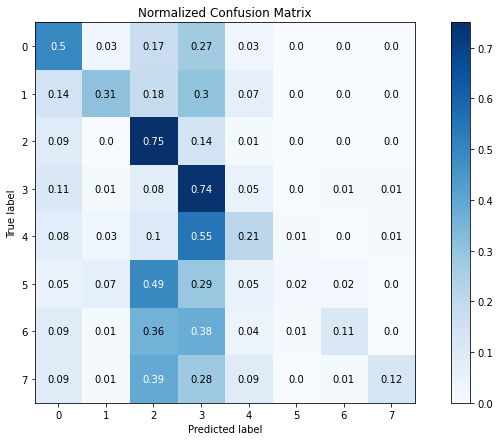

In [ ]:
print_metrics(two_step_clf)

## Observations
- From the results we can observe that our custom 2-Step-Classifier model performs on-par with the individual models tested
- We dont find any significant improvement in the results when compared to individual algorithms used in the previous steps.

# Using FastText embeddings


*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.48946369804568396
Precision :  0.9138250086149947
Recall :  0.9092685309561607
F1-Score :  0.9080303161983465

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.3078775476743147
Precision :  0.5764392091466157
Recall :  0.5743680188124632
F1-Score :  0.5351107062839726



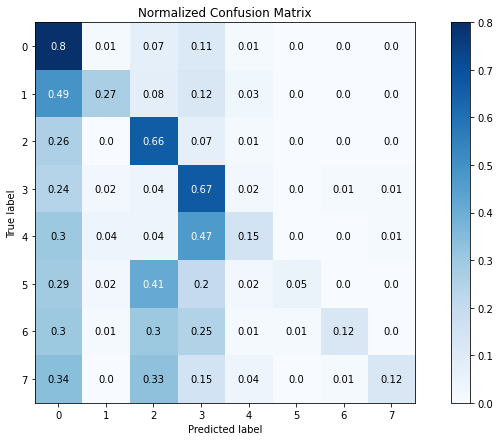

In [ ]:
clf_xgb = XGBClassifier(max_depth=5, n_estimators=100,n_jobs=-1)
clf_xgb.fit(X_train,y_train)
print_metrics(clf_xgb)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  1.3217180755189357
Precision :  0.5180685190774876
Recall :  0.5682012455733301
F1-Score :  0.5163082703320883

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.4034664934012588
Precision :  0.5075544371705584
Recall :  0.5485008818342152
F1-Score :  0.49733894893064645



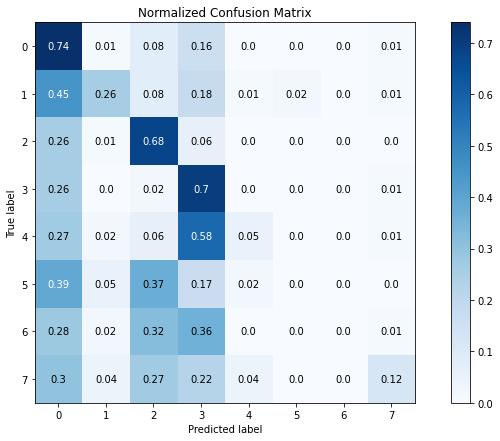

In [ ]:
clf_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
clf_lr.fit(X_train, y_train)
print_metrics(clf_lr)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.37230857605779993
Precision :  0.9553380573300216
Recall :  0.9537184027353768
F1-Score :  0.953688983630473

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.8247863197111356
Precision :  0.5591398898379684
Recall :  0.5432098765432098
F1-Score :  0.4926847561412541



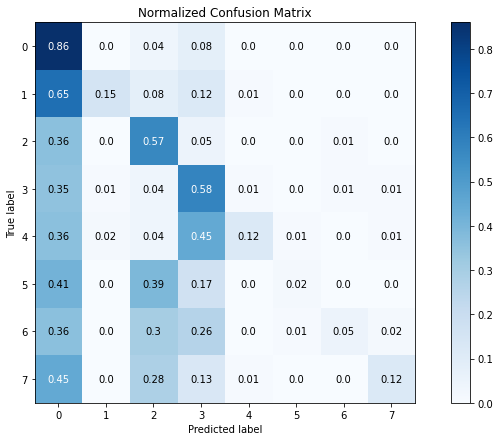

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_clf.fit(X_train, y_train)
print_metrics(rf_clf)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.4890300200555544
Precision :  0.9142944007516588
Recall :  0.9104896812797655
F1-Score :  0.9095996988882948

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.3138496836978244
Precision :  0.5824929967051246
Recall :  0.5778953556731334
F1-Score :  0.5385629614678134



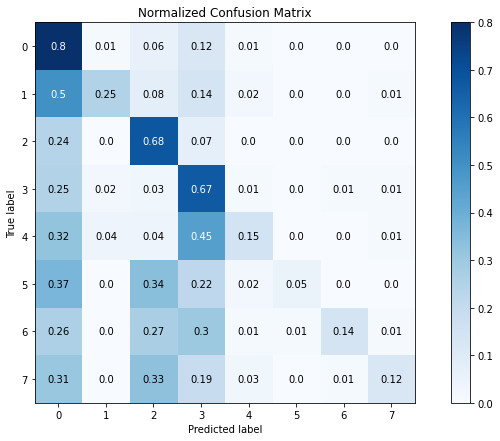

In [ ]:
lbgm_clf = LGBMClassifier(max_depth=5,n_estimators=100,n_jobs=-1)
lbgm_clf.fit(X_train, y_train)
print_metrics(lbgm_clf)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.19130300002834028
Precision :  0.9209667865597115
Recall :  0.910123336182684
F1-Score :  0.912534857596705

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  20.5084470899601
Precision :  0.3447410599243919
Recall :  0.3221634332745444
F1-Score :  0.33044701340573346



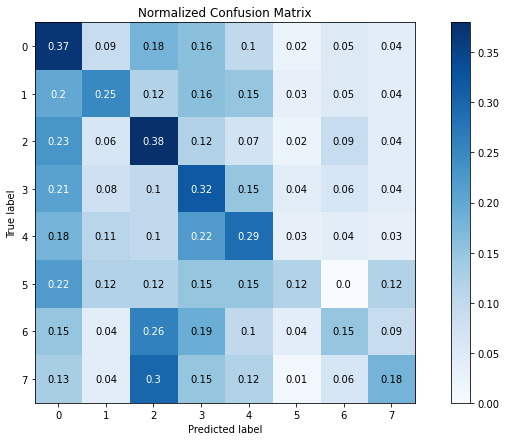

In [ ]:
clf_dt = DecisionTreeClassifier(class_weight='balanced', max_depth=200,min_samples_split=4)
clf_dt.fit(X_train,y_train)
print_metrics(clf_dt)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  18.858172447810773
Precision :  0.5419195894374459
Recall :  0.1456832336060569
F1-Score :  0.1314940081855169

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  19.16012047340676
Precision :  0.28719357600171147
Recall :  0.13991769547325103
F1-Score :  0.12508950936514815



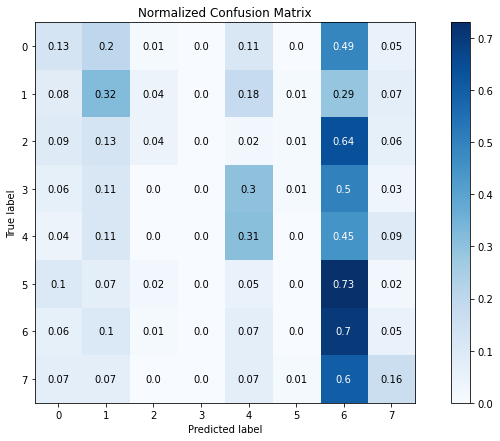

In [ ]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
print_metrics(clf_nb)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.4479989281438005
Precision :  0.9107831225972092
Recall :  0.9079252656001954
F1-Score :  0.9068999924710012

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.3377281186770018
Precision :  0.5598449338600033
Recall :  0.5726043503821282
F1-Score :  0.5379136198018436



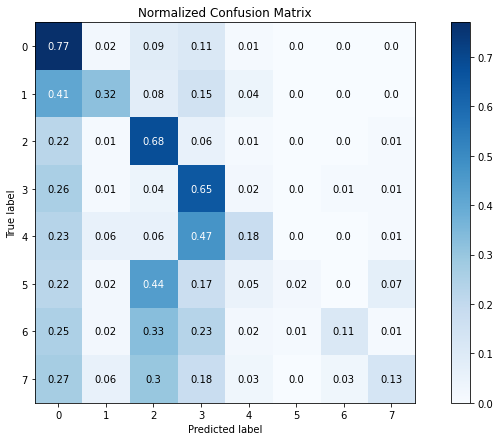

In [ ]:
clf_cb = CatBoostClassifier(verbose=0, n_estimators=200)
clf_cb.fit(X_train, y_train)
print_metrics(clf_cb)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.5716964286513194
Precision :  0.9360523487015704
Recall :  0.9324703871046526
F1-Score :  0.9324468612042679

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.4168632048787093
Precision :  0.5606191046873116
Recall :  0.5473251028806584
F1-Score :  0.5184325700653726



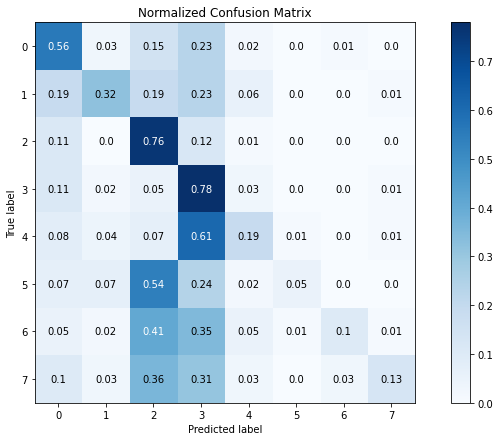

In [ ]:
ovr_model = LGBMClassifier(max_depth=5,n_estimators=200,n_jobs=-1).fit(X_train_ovr,y_train_ovr)
clf_model = XGBClassifier(max_depth=5, n_estimators=100,n_jobs=-1).fit(X_train_clf,y_train_clf)
two_step_clf = TwoStepClassifier()
two_step_clf.load_models(ovr_model, clf_model)
print_metrics(two_step_clf)


In [ ]:
log_models = [("Logistic Regression",clf_lr),("Random Forest",rf_clf),
("XGBoost",clf_xgb),("LightGBM",lbgm_clf),("Decision Tree",clf_dt),
("Naive Bayes",clf_nb),("CatBoost",clf_cb),("2-Step Classifier",two_step_clf)]

print_metrics_table(log_models)

+---------------------+---------------+-----------+-----------+-----------+--------------+-----------+-----------+-----------+
|                     | TRAIN METRICS |           |           |           | TEST METRICS |           |           |           |
+---------------------+---------------+-----------+-----------+-----------+--------------+-----------+-----------+-----------+
|        MODEL        |    Log-Loss   |  f1-Sore  | Precision |   Recall  |   Log-Loss   |  F1-Score | Precision |   Recall  |
|      ---------      |   ---------   | --------- | --------- | --------- |  ---------   | --------- | --------- | --------- |
|       XGBoost       |     0.489     |   0.908   |   0.914   |   0.909   |    1.308     |   0.535   |   0.576   |   0.574   |
|       LightGBM      |     0.489     |    0.91   |   0.914   |    0.91   |    1.314     |   0.539   |   0.582   |   0.578   |
|       CatBoost      |     0.448     |   0.907   |   0.911   |   0.908   |    1.338     |   0.538   |    0.56 

# Using BERT embeddings


*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.5586760211219637
Precision :  0.9083429540774246
Recall :  0.9029185492734155
F1-Score :  0.9023364186390005

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.4197337443752545
Precision :  0.5220674061097913
Recall :  0.5302763080540859
F1-Score :  0.48846128046608056



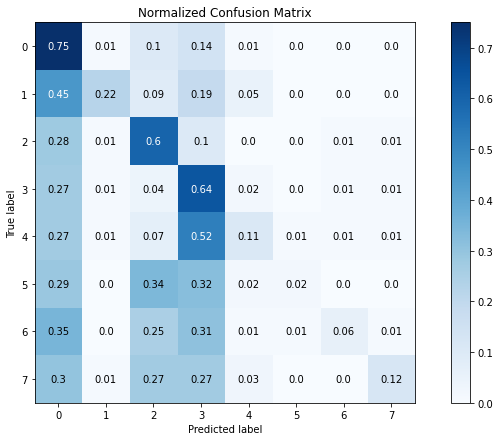

In [72]:
clf_xgb = XGBClassifier(max_depth=5, n_estimators=100,n_jobs=-1)
clf_xgb.fit(X_train,y_train)
print_metrics(clf_xgb)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  1.5238283658303362
Precision :  0.42244301686758023
Recall :  0.48259860788863107
F1-Score :  0.42810285270883364

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.5785832437726164
Precision :  0.3940766092080147
Recall :  0.46854791299235743
F1-Score :  0.4124453169201123



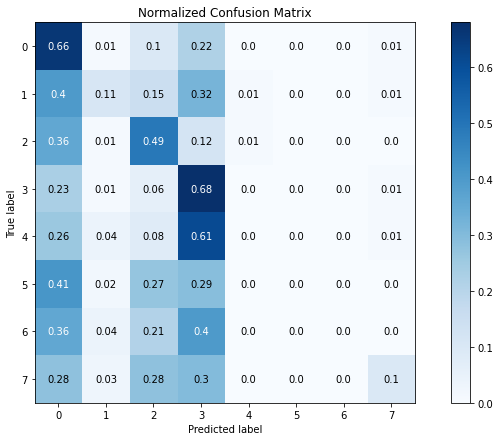

In [73]:
clf_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
clf_lr.fit(X_train, y_train)
print_metrics(clf_lr)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.3831391952206012
Precision :  0.9564227805900882
Recall :  0.9548174380266211
F1-Score :  0.9547990989014433

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.848504628351243
Precision :  0.525302784138763
Recall :  0.5049970605526161
F1-Score :  0.4579119232503395



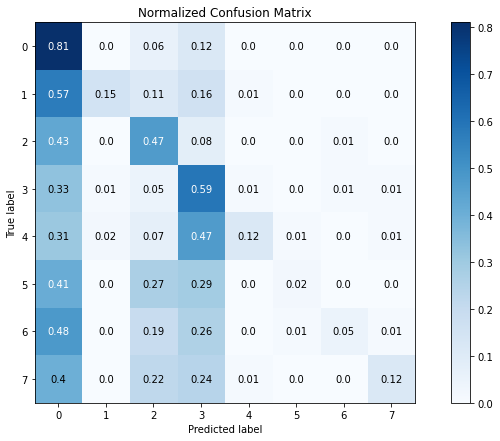

In [74]:
rf_clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_clf.fit(X_train, y_train)
print_metrics(rf_clf)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.5752938727879258
Precision :  0.9043829824377159
Recall :  0.8988887532055196
F1-Score :  0.8980424051939497

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.432532539894488
Precision :  0.5253899784540574
Recall :  0.5291005291005291
F1-Score :  0.4868749197200178



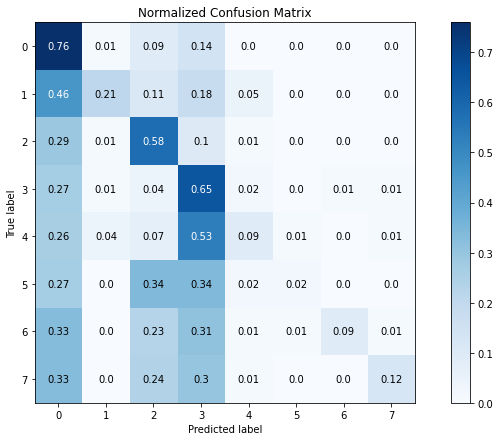

In [75]:
lbgm_clf = LGBMClassifier(max_depth=5,n_estimators=100,n_jobs=-1)
lbgm_clf.fit(X_train, y_train)
print_metrics(lbgm_clf)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.19294906858254765
Precision :  0.9195268597346546
Recall :  0.9089021858590792
F1-Score :  0.911135488614034

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  21.436826717327758
Precision :  0.32266124549815167
Recall :  0.3045267489711934
F1-Score :  0.311570456936674



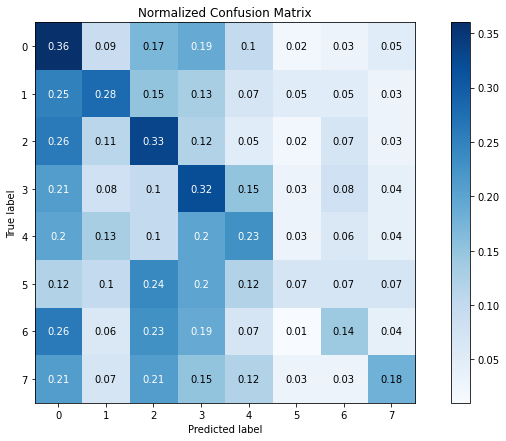

In [76]:
clf_dt = DecisionTreeClassifier(class_weight='balanced', max_depth=200,min_samples_split=4)
clf_dt.fit(X_train,y_train)
print_metrics(clf_dt)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  15.065807452519243
Precision :  0.4110748001022713
Recall :  0.3061423861277323
F1-Score :  0.3193163372126702

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  15.360957837673425
Precision :  0.3841525920383303
Recall :  0.2927689594356261
F1-Score :  0.3020913745010073



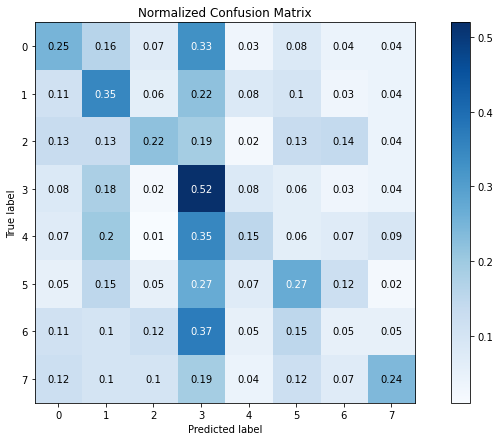

In [77]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
print_metrics(clf_nb)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.5619939487981952
Precision :  0.887538453214633
Recall :  0.8811820735132495
F1-Score :  0.8794029949877855

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.4552095693821512
Precision :  0.49539963898623235
Recall :  0.5120517342739564
F1-Score :  0.4784870894906126



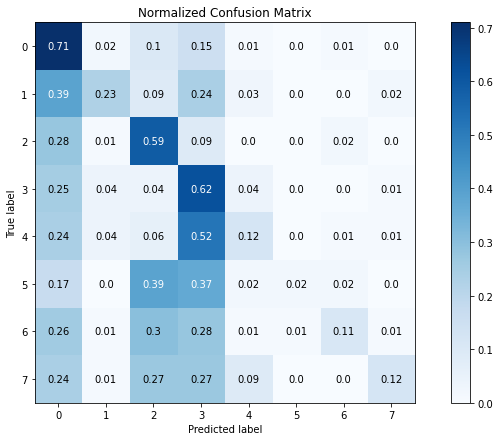

In [78]:
clf_cb = CatBoostClassifier(verbose=0, n_estimators=200)
clf_cb.fit(X_train, y_train)
print_metrics(clf_cb)

*-*-*-**-*-*-TRAIN METRICS*-*-*-*-*-*-
Log Loss:  0.6813683306229789
Precision :  0.9321099389797884
Recall :  0.9277079008425937
F1-Score :  0.9278871922946413

*-*-*-**-*-*-TEST METRICS*-*-*-*-*-*-
Log Loss:  1.5402549354934822
Precision :  0.5148831041620368
Recall :  0.48500881834215165
F1-Score :  0.4536490304640635



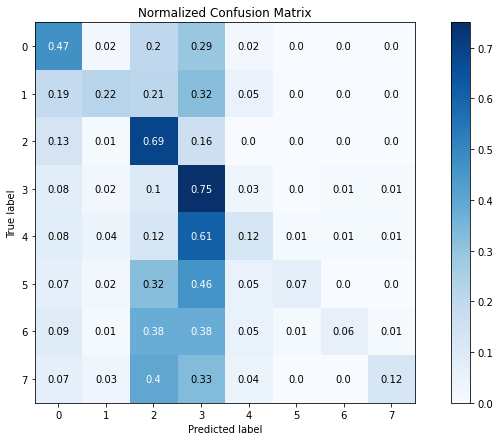

In [79]:
ovr_model = LGBMClassifier(max_depth=5,n_estimators=200,n_jobs=-1).fit(X_train_ovr,y_train_ovr)
clf_model = XGBClassifier(max_depth=5, n_estimators=100,n_jobs=-1).fit(X_train_clf,y_train_clf)
two_step_clf = TwoStepClassifier()
two_step_clf.load_models(ovr_model, clf_model)
print_metrics(two_step_clf)


In [81]:
log_models = [("Logistic Regression",clf_lr),("Random Forest",rf_clf),
("XGBoost",clf_xgb),("LightGBM",lbgm_clf),("Decision Tree",clf_dt),
("Naive Bayes",clf_nb),("CatBoost",clf_cb),("2-Step Classifier",two_step_clf)]

print_metrics_table(log_models)

+---------------------+---------------+-----------+-----------+-----------+--------------+-----------+-----------+-----------+
|                     | TRAIN METRICS |           |           |           | TEST METRICS |           |           |           |
+---------------------+---------------+-----------+-----------+-----------+--------------+-----------+-----------+-----------+
|        MODEL        |    Log-Loss   |  f1-Sore  | Precision |   Recall  |   Log-Loss   |  F1-Score | Precision |   Recall  |
|      ---------      |   ---------   | --------- | --------- | --------- |  ---------   | --------- | --------- | --------- |
|       XGBoost       |     0.559     |   0.902   |   0.908   |   0.903   |     1.42     |   0.488   |   0.522   |    0.53   |
|       LightGBM      |     0.575     |   0.898   |   0.904   |   0.899   |    1.433     |   0.487   |   0.525   |   0.529   |
|       CatBoost      |     0.562     |   0.879   |   0.888   |   0.881   |    1.455     |   0.478   |   0.495 

# Comparison between Machine Learning Models

In [ ]:
log_models = [("SVM",clf_svm),("Logistic Regression",clf_lr),("Random Forest",rf_clf),
("XGBoost",clf_xgb),("LightGBM",lbgm_clf),("Decision Tree",clf_dt),
("Naive Bayes",clf_nb),("CatBoost",clf_cb),("Custom 2-Step Classifier",two_step_clf),("Random Model",dummy_clf)]

print_metrics_table(log_models)

+--------------------------+---------------+-----------+-----------+-----------+--------------+-----------+-----------+-----------+
|                          | TRAIN METRICS |           |           |           | TEST METRICS |           |           |           |
+--------------------------+---------------+-----------+-----------+-----------+--------------+-----------+-----------+-----------+
|          MODEL           |    Log-Loss   |  f1-Sore  | Precision |   Recall  |   Log-Loss   |  F1-Score | Precision |   Recall  |
|        ---------         |   ---------   | --------- | --------- | --------- |  ---------   | --------- | --------- | --------- |
|         XGBoost          |     0.522     |   0.912   |   0.916   |   0.913   |    1.376     |   0.508   |   0.552   |   0.545   |
|         LightGBM         |     0.516     |   0.914   |   0.917   |   0.915   |    1.378     |   0.515   |   0.557   |   0.551   |
|         CatBoost         |      0.49     |   0.897   |    0.9    |   0.898

# Deep Learning Models

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

tf.config.run_functions_eagerly(True)

## Pre-Processing

In [ ]:
tknizer = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ')
tknizer.fit_on_texts(df_train["Description"].values)
vocab_size = len(tknizer.word_counts)


train_texts = tknizer.texts_to_sequences(df_train["Description"].values)
test_texts = tknizer.texts_to_sequences(df_test["Description"].values)

print(len(train_texts))
print(len(test_texts))

8189
1701


In [ ]:
# finding maxlen
max_len = max([len(x) for x in train_texts])

train_texts = pad_sequences(train_texts, maxlen=max_len, padding='post')
test_texts = pad_sequences(test_texts, maxlen=max_len, padding='post')

print(len(train_texts),len(train_texts[0]))
print(len(test_texts), len(test_texts[0]))

8189 524
1701 524


In [ ]:
train_data_numerical = df_train.drop(columns=["class","Description"]).values
test_data_numerical = df_test.drop(columns=["Description","class"]).values

print(train_data_numerical.shape)
print(test_data_numerical.shape)

(8189, 11)
(1701, 11)


## Model 1 - Using Embedding Layer

In [ ]:
# Text input
input1 = Input(shape=(524,),name="text_inputs")
embed = Embedding(input_dim=vocab_size+1, output_dim=70, input_length=max_len)(input1)
dense2 = Dense(64, activation='relu')(embed)
dense3 = Dense(32, activation='relu')(dense2)
dense4 = Dense(16, activation='relu')(dense3)
flat = Flatten()(dense4)
output = Dense(8, activation='softmax')(flat)

In [ ]:
model = Model(inputs=input1, outputs = output)
model.summary()
# plot_model(model)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_inputs (InputLayer)     [(None, 524)]             0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 524, 70)           465360    
_________________________________________________________________
dense_24 (Dense)             (None, 524, 64)           4544      
_________________________________________________________________
dense_25 (Dense)             (None, 524, 32)           2080      
_________________________________________________________________
dense_26 (Dense)             (None, 524, 16)           528       
_________________________________________________________________
flatten_5 (Flatten)          (None, 8384)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 6708

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [ ]:
history = model.fit(
    train_texts,
    y_train,
    epochs = 10,
    validation_data = (test_texts, y_test)
)


Epoch 1/10
256/256 [==============================] - 8s 33ms/step - loss: 1.6402 - accuracy: 0.4069 - val_loss: 1.4530 - val_accuracy: 0.5179
Epoch 2/10
256/256 [==============================] - 8s 33ms/step - loss: 1.2375 - accuracy: 0.5926 - val_loss: 1.3291 - val_accuracy: 0.5738
Epoch 3/10
256/256 [==============================] - 8s 33ms/step - loss: 1.0612 - accuracy: 0.6489 - val_loss: 1.3569 - val_accuracy: 0.5726
Epoch 4/10
256/256 [==============================] - 8s 33ms/step - loss: 0.9559 - accuracy: 0.6832 - val_loss: 1.4483 - val_accuracy: 0.5608
Epoch 5/10
256/256 [==============================] - 9s 33ms/step - loss: 0.8756 - accuracy: 0.7039 - val_loss: 1.5894 - val_accuracy: 0.5344
Epoch 6/10
256/256 [==============================] - 9s 33ms/step - loss: 0.8125 - accuracy: 0.7249 - val_loss: 1.6985 - val_accuracy: 0.5332
Epoch 7/10
256/256 [==============================] - 8s 33ms/step - loss: 0.7663 - accuracy: 0.7426 - val_loss: 1.8152 - val_accuracy: 0.5273

In [ ]:
print("Train Log Loss: ",log_loss(y_train, model.predict(train_texts)))
print("Test Log Loss: ",log_loss(y_test, model.predict(test_texts)))

Train Log Loss:  0.5767402175795475
Test Log Loss:  2.2482574390579235


In [ ]:
model.save_weights("Safe_city_Model1.h5")

## Model 2 - Using LSTM + Embedding Layer for Text Data

In [ ]:
# Text input
input1 = Input(shape=(524,),name="text_inputs")
embed = Embedding(input_dim=vocab_size+1, output_dim=70, input_length=max_len)(input1)
lstm = LSTM(64)(embed)
dense3 = Dense(32, activation='relu')(lstm)
dense4 = Dense(16, activation='relu')(dense3)
output = Dense(8, activation='softmax')(dense4)

In [ ]:
model2 = Model(inputs=input1, outputs = output)
model2.summary()
# plot_model(model2)

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_inputs (InputLayer)     [(None, 524)]             0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 524, 70)           465360    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                34560     
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
Total params: 502,664
Trainable params: 502,664
Non-trainable params: 0
_____________________________________________________

In [ ]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [ ]:
history2 = model2.fit(
    train_texts,
    y_train,
    epochs = 10,
    validation_data = (test_texts, y_test)
)


Epoch 1/10
256/256 [==============================] - 15s 57ms/step - loss: 1.8444 - accuracy: 0.2843 - val_loss: 1.7800 - val_accuracy: 0.3175
Epoch 2/10
256/256 [==============================] - 14s 56ms/step - loss: 1.7633 - accuracy: 0.3122 - val_loss: 1.7895 - val_accuracy: 0.3175
Epoch 3/10
256/256 [==============================] - 15s 57ms/step - loss: 1.7627 - accuracy: 0.3122 - val_loss: 1.7796 - val_accuracy: 0.3175
Epoch 4/10
256/256 [==============================] - 14s 55ms/step - loss: 1.7621 - accuracy: 0.3122 - val_loss: 1.7796 - val_accuracy: 0.3175
Epoch 5/10
256/256 [==============================] - 13s 51ms/step - loss: 1.7618 - accuracy: 0.3122 - val_loss: 1.7804 - val_accuracy: 0.3175
Epoch 6/10
256/256 [==============================] - 13s 52ms/step - loss: 1.7613 - accuracy: 0.3122 - val_loss: 1.7904 - val_accuracy: 0.3175
Epoch 7/10
256/256 [==============================] - 13s 52ms/step - loss: 1.7622 - accuracy: 0.3122 - val_loss: 1.7787 - val_accuracy:

In [ ]:
print("Train Log Loss: ",log_loss(y_train, model2.predict(train_texts)))
print("Test Log Loss: ",log_loss(y_test, model2.predict(test_texts)))

Train Log Loss:  1.7593416014001808
Test Log Loss:  1.7791910887044855


In [ ]:
model2.save_weights("Safe_city_Model2.h5")

## Observations from Deep Learning Models
| Model | Train Logloss | Test Losloss |
|--|--|--|
|NN + Embedding | 0.57674 | 2.24825 |
|NN + Embedding + LSTM  | 1.759341 | 1.7791 |

- From both the Deep learning models we have observed that although we are able to reduce the Log_Loss for train_data to a good extend but the log_loss reducttion in case of Test_Data is not that significant
- One probable reason for this is that maybe due to relatively smaller dataset our models tend to overfit for test data.

In [ ]:
!jupyter nbconvert --to html "/content/Safe_City_25_GB.ipynb"

[NbConvertApp] Converting notebook /content/Safe_City_25_GB.ipynb to html
[NbConvertApp] Writing 2181963 bytes to /content/Safe_City_25_GB.html


In [ ]:
with open('glove_vectors', 'rb') as f:
  glove_vector = pickle.load(f)
  glove_words = set(glove_vector.keys())
